# **Nom du Projet**    -  **Prediction du prix d'une voiture d'occasion sur Leboncoin**

##### **Type de Projet**    - Regression
##### **Contribution**    - Groupe : Ismael DEMBELE & Anne Laure

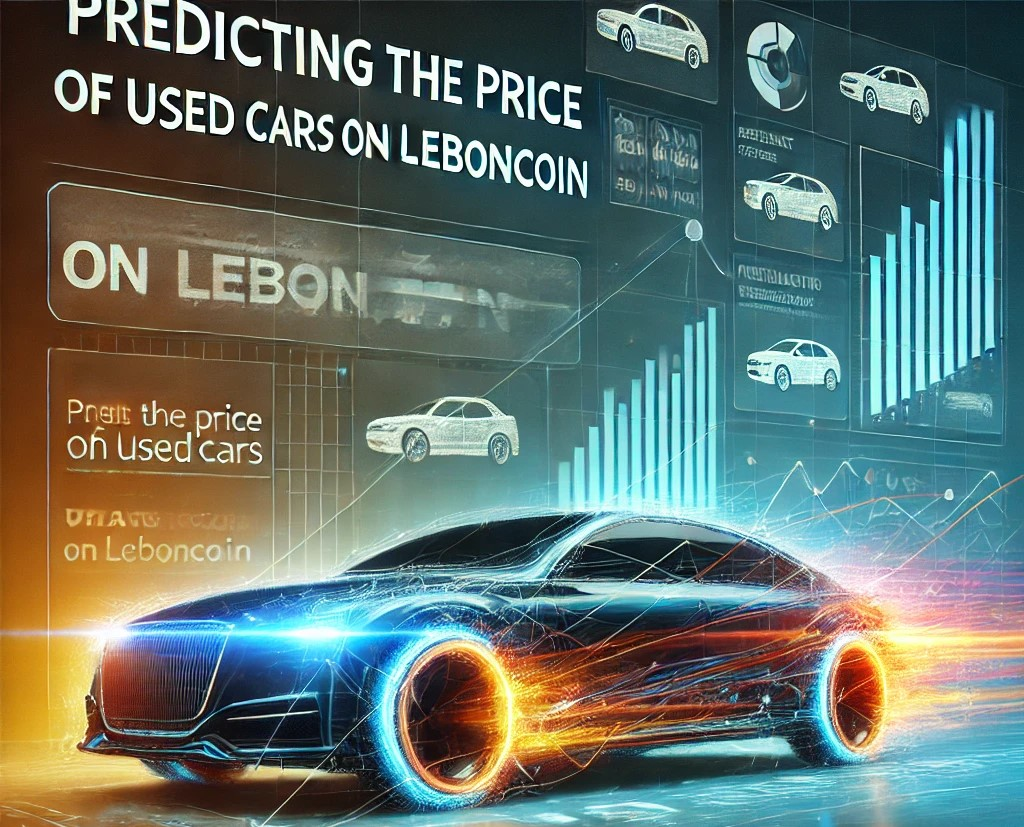

# **Résumé du projet -**


Ce projet vise à analyser le marché des produits d’occasion en France, en se concentrant sur les annonces publiées sur des plateformes comme LeBonCoin. L’objectif principal est de comprendre les facteurs influençant le prix des produits, notamment les voitures, en exploitant des données collectées directement sur ces plateformes. Ce notebook présente une démarche structurée allant de la collecte des données au développement d’un modèle prédictif, tout en intégrant une analyse descriptive pour explorer les tendances du marché. Il s’agit d’un exercice pratique en data science combinant scraping, exploration des données et modélisation pour répondre à des questions concrètes sur le marché de l’occasion.

# **Index**

1.   Énoncé du problème
2.   Connaître ses données
3.   Comprendre les variables
4.   L'EAD
5.   Ingénierie des caractéristiques
6.   Construction du modèle
7.   Conclusion

# **C'est parti !**

## **1. Énoncé du problème**

La prédiction du prix d’une voiture est un domaine de recherche de grand intérêt, car elle nécessite un effort
notable, une connaissance du domaine et un nombre considérable d’attributs distincts pour une prédiction fiable et
précise (Gegic et al., 2019). La tâche est particulièrement critique et importante lorsque le véhicule est utilisé et ne
sort pas directement de l’usine. D’une part, en raison de l’augmentation de la demande. En effet, en 2021, le marché
des voitures d’occasion en France valait environ 9,96 milliards de dollars américains et la taille du marché devrait
atteindre près de 12,74 milliards de dollars américains d’ici 2027. [1] Les ventes de véhicules d’occasion en France ont
atteint un niveau record en 2021, et s’établissent à environ 5,2 millions de transactions en 2022. D’autre part, la valeur
des voitures d’occasion dépend d’un certain nombre de facteurs (âge de la voiture, modèle, kilométrage, puissance,
type de carburant, équipements, etc.), malheureusement, dans la pratique, la plupart des gens ne connaissent pas
exactement toutes ces informations, de sorte que tous ces facteurs ne sont pas toujours disponibles et que l’acheteur
doit prendre la décision d’acheter à un certain prix en se basant sur quelques facteurs seulement (Pudaruth, 2014).
Les techniques de prédiction de l’apprentissage automatique peuvent être utiles à cet égard.

* Problématique: L’objectif de ce projet est de prédire les prix des voitures d’occasion en France.

## **2. Préparation des données**

### Importation des Libraries

In [133]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error

### Chargement des donnees 

In [120]:
leboncoin_ads=pd.read_json(os.getcwd()+"/Data/leboncoin_ads.json")
df=leboncoin_ads.copy()
df.head()

,list_id,first_publication_date,expiration_date,index_date,status,category_id,category_name,subject,body,brand,ad_type,url,price,price_cents,images,attributes,location,owner,options,has_phone,similar,counters,is_boosted,extended_attributes
0,2915147681,2025-01-07 16:17:34,2025-03-08 16:17:34,2025-01-07 16:17:34,active,2,Voitures,BMW série 1 Pack M Sport,,leboncoin,offer,https://www.leboncoin.fr/ad/voitures/2915147681,[11490],1149000,{'thumb_url': 'https://img.leboncoin.fr/api/v1...,"[{'key': 'activity_sector', 'value': '1', 'val...","{'country_id': 'FR', 'region_id': '1', 'region...","{'store_id': '36203103', 'user_id': '171ca0e6-...","{'has_option': False, 'booster': False, 'photo...",True,NaN,{},NaN,NaN
1,2906060394,2024-12-19 12:33:00,NaN,2025-01-07 16:15:46,active,2,Voitures,Mercedes Classe A 180 d Progressive Line Siège...,,leboncoin,offer,https://www.leboncoin.fr/ad/voitures/2906060394,[24990],2499000,{'thumb_url': 'https://img.leboncoin.fr/api/v1...,"[{'key': 'activity_sector', 'value': '1', 'val...","{'country_id': 'FR', 'region_id': '1', 'region...","{'store_id': '43500944', 'user_id': '5569eaa8-...","{'has_option': False, 'booster': False, 'photo...",True,NaN,{},1.0,NaN
2,2906056677,2024-12-19 14:08:00,NaN,2025-01-07 16:15:46,active,2,Voitures,Mercedes Classe A 250 e AMG Line -Pack Premium,,leboncoin,offer,https://www.leboncoin.fr/ad/voitures/2906056677,[38990],3899000,{'thumb_url': 'https://img.leboncoin.fr/api/v1...,"[{'key': 'activity_sector', 'value': '1', 'val...","{'country_id': 'FR', 'region_id': '1', 'region...","{'store_id': '191246', 'user_id': '82c6d06c-bc...","{'has_option': False, 'booster': False, 'photo...",True,NaN,{},1.0,NaN
3,2901139970,2024-12-10 09:30:00,NaN,2025-01-07 16:15:46,active,2,Voitures,Volkswagen Golf 1.5 eTSI OPF 150ch R-Line DSG7,,leboncoin,offer,https://www.leboncoin.fr/ad/voitures/2901139970,[33490],3349000,{'thumb_url': 'https://img.leboncoin.fr/api/v1...,"[{'key': 'activity_sector', 'value': '1', 'val...","{'country_id': 'FR', 'region_id': '1', 'region...","{'store_id': '29739690', 'user_id': 'b82f7487-...","{'has_option': False, 'booster': False, 'photo...",True,NaN,{},1.0,NaN
4,2895925882,2024-12-03 09:20:00,NaN,2025-01-07 16:15:46,active,2,Voitures,Renault Captur E-Tech Plug-in 160 Intens,,leboncoin,offer,https://www.leboncoin.fr/ad/voitures/2895925882,[18990],1899000,{'thumb_url': 'https://img.leboncoin.fr/api/v1...,"[{'key': 'activity_sector', 'value': '1', 'val...","{'country_id': 'FR', 'region_id': '1', 'region...","{'store_id': '175824', 'user_id': 'd92ae14f-f9...","{'has_option': False, 'booster': False, 'photo...",True,NaN,{},1.0,NaN


### Nombre de lignes et colonnes

In [121]:
print(f"nombre d'annonces  : {df.shape[0]}  \nnombre de colonnes : {df.shape[1]}")

nombre d'annonces  : 81710  
nombre de colonnes : 24


### Information sur les donnees

In [122]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81710 entries, 0 to 81709
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   list_id                 81710 non-null  int64  
 1   first_publication_date  81710 non-null  object 
 2   expiration_date         29736 non-null  object 
 3   index_date              81710 non-null  object 
 4   status                  81710 non-null  object 
 5   category_id             81710 non-null  int64  
 6   category_name           81710 non-null  object 
 7   subject                 81710 non-null  object 
 8   body                    81710 non-null  object 
 9   brand                   81710 non-null  object 
 10  ad_type                 81710 non-null  object 
 11  url                     81710 non-null  object 
 12  price                   81710 non-null  object 
 13  price_cents             81710 non-null  int64  
 14  images                  81710 non-null

In [123]:
#Les colonnes
df.columns

Index(['list_id', 'first_publication_date', 'expiration_date', 'index_date',
       'status', 'category_id', 'category_name', 'subject', 'body', 'brand',
       'ad_type', 'url', 'price', 'price_cents', 'images', 'attributes',
       'location', 'owner', 'options', 'has_phone', 'similar', 'counters',
       'is_boosted', 'extended_attributes'],
      dtype='object')

In [124]:
#compter le nombre de modalités par column
def count_modalities(dataset):
    compteur={}
    for column_name in dataset.columns:
        try:
            compteur[column_name]=len(set(dataset[column_name]))
        except TypeError as e:
            compteur[column_name]=str(e)
            pass
    return compteur
count_modalities(df)

{'list_id': 80783,
 'first_publication_date': 65304,
 'expiration_date': 24962,
 'index_date': 29195,
 'status': 1,
 'category_id': 1,
 'category_name': 1,
 'subject': 57754,
 'body': 1,
 'brand': 1,
 'ad_type': 1,
 'url': 80783,
 'price': "unhashable type: 'list'",
 'price_cents': 5596,
 'images': "unhashable type: 'dict'",
 'attributes': "unhashable type: 'list'",
 'location': "unhashable type: 'dict'",
 'owner': "unhashable type: 'dict'",
 'options': "unhashable type: 'dict'",
 'has_phone': 2,
 'similar': 81710,
 'counters': "unhashable type: 'dict'",
 'is_boosted': 49302,
 'extended_attributes': "unhashable type: 'dict'"}

On distingue de nombreux dictionnnaires et listes en colonne qu'il va falloir traiter pour en extraire les informations les plus pertinentes, pour raffiner notre jeu de donnees afin d'entamer serenement la phase descriptive.

In [125]:
# Étape 3 : Nettoyage des données
# Suppression des colonnes inutiles ou redondantes
colonnes_existantes = set(df.columns)
colonnes_a_supprimer = {
    'index_date', 'subject', 'body', 'brand', 'ad_type', 'options',
    'owner', 'has_phone', 'status', 'price_cents', 'images', 'similar', 'counters', 
    'extended_attributes', 'expiration_date', 'options.has_option', 
    'options.photosup', 'options.gallery', 'options.sub_toplist', 
    'options.continuous_top_ads', 'options.highlight', 'category_id', 'category_name'
}
df = df.drop(columns=colonnes_existantes & colonnes_a_supprimer, errors='ignore')
print("Taille:", df.shape, "\n Colonnes:", df.columns)

Taille: (81710, 7) 
 Colonnes: Index(['list_id', 'first_publication_date', 'url', 'price', 'attributes',
       'location', 'is_boosted'],
      dtype='object')


In [126]:
#Suppression des doublons
df = df.drop_duplicates(subset=['list_id'])

In [127]:
# Étape 4 : Traitement des valeurs manquantes
# Supprimer les lignes où les colonnes essentielles sont manquantes
colonnes_essentielles = ['price', 'attributes']
df = df.dropna(subset=colonnes_essentielles)

In [128]:
# Étape 5 : Extraction des données imbriquées
# Extraire les attributs clés depuis la colonne 'attributes'
def extraire_attributs_vectorise(attributes, keys):
    if not isinstance(attributes, list):
        return {key: None for key in keys}
    
    result = {key: None for key in keys}
    for attr in attributes:
        key = attr.get('key')
        if key in keys:
            result[key] = attr.get('value_label')
    return result

# Liste des clés à extraire
keys_to_extract = [
    'brand', 'model', 'fuel', 'mileage', 'regdate', 'gearbox', 'doors', 'seats',
    'vehicle_technical_inspection_a', 'issuance_date', 'vehicle_damage', 'vehicle_type',
    'vehicle_upholstery', 'vehicule_color', 'horsepower', 'horse_power_din',
    'vehicle_is_eligible_p2p', 'vehicle_history_report_public_url',
    'licence_plate_available', 'critair', 'gross_vehicle_weight', 'vehicle_interior_specs'
]

In [129]:
# Extraction vectorisée des attributs
extracted_attributes = df['attributes'].apply(lambda x: extraire_attributs_vectorise(x, keys_to_extract))
extracted_df = pd.DataFrame(list(extracted_attributes))

# Fusionner les attributs extraits avec le DataFrame principal
df = pd.concat([df, extracted_df], axis=1)

# Suppression de la colonne 'attributes' après extraction
df = df.drop(columns=['attributes'], errors='ignore')

In [130]:
# Extraire les données de localisation
def extraire_localisation(location, key):
    if isinstance(location, dict):
        return location.get(key)
    return None

df['region_name'] = df['location'].apply(lambda x: extraire_localisation(x, 'region_name'))
df['department_name'] = df['location'].apply(lambda x: extraire_localisation(x, 'department_name'))
df['city'] = df['location'].apply(lambda x: extraire_localisation(x, 'city'))
df['zipcode'] = df['location'].apply(lambda x: extraire_localisation(x, 'zipcode'))
df['lat'] = df['location'].apply(lambda x: extraire_localisation(x, 'lat'))
df['lng'] = df['location'].apply(lambda x: extraire_localisation(x, 'lng'))

In [131]:
# Suppression de la colonne 'location' après extraction
df = df.drop(columns=['location'], errors='ignore')

In [132]:
# Étape 6 : Transformation des données
# Convertir le kilometrage et le prix en numérique
df['mileage'] = df['mileage'].str.replace(' km', '').str.replace(r'\s+', '').astype(float)
df['price'] = df['price'].apply(lambda x: x[0] if isinstance(x, list) else x).astype(float)

# Harmoniser les colonnes de texte
df['brand'] = df['brand'].str.lower()
df['model'] = df['model'].str.lower()

In [133]:
# Étape 7 : Renommer les colonnes pour une meilleure lisibilité
colonnes_renommees = {
    'list_id': 'identifiant',
    'first_publication_date': 'date_publication',
    'url': 'lien_annonce',
    'price': 'prix',
    'is_boosted': 'booste',
    'brand': 'marque',
    'model': 'modele',
    'fuel': 'carburant',
    'mileage': 'kilometrage',
    'regdate': 'annee_modele',
    'gearbox': 'boite_vitesse',
    'doors': 'portes',
    'seats': 'places',
    'vehicle_technical_inspection_a': 'controle_technique',
    'issuance_date': 'date_mise_en_circulation',
    'vehicle_damage': 'etat_vehicule',
    'vehicle_type': 'type_vehicule',
    'vehicle_upholstery': 'sellerie',
    'vehicule_color': 'couleur',
    'horsepower': 'puissance_fiscale',
    'horse_power_din': 'puissance_din',
    'vehicle_is_eligible_p2p': 'eligible_p2p',
    'vehicle_history_report_public_url': 'rapport_historique',
    'licence_plate_available': 'plaque_disponible',
    'critair': 'critair',
    'gross_vehicle_weight': 'poids_total_autorise',
    'vehicle_interior_specs': 'equipements_interieurs',
    'region_name': 'region',
    'department_name': 'departement',
    'city': 'ville',
    'zipcode': 'code_postal',
    'lat': 'latitude',
    'lng': 'longitude'
}
df = df.rename(columns=colonnes_renommees)

In [134]:
#compter le nombre de modalités par column
count_modalities(df)

{'identifiant': 81706,
 'date_publication': 65305,
 'lien_annonce': 80784,
 'prix': 6519,
 'booste': 49807,
 'marque': 84,
 'modele': 643,
 'carburant': 8,
 'kilometrage': 34028,
 'annee_modele': 67,
 'boite_vitesse': 3,
 'portes': 7,
 'places': 9,
 'controle_technique': 21,
 'date_mise_en_circulation': 771,
 'etat_vehicule': 4,
 'type_vehicule': 11,
 'sellerie': 76,
 'couleur': 19,
 'puissance_fiscale': 91,
 'puissance_din': 516,
 'eligible_p2p': 4,
 'rapport_historique': 39643,
 'plaque_disponible': 3,
 'critair': 9,
 'poids_total_autorise': 109,
 'equipements_interieurs': 1858,
 'region': 26,
 'departement': 67,
 'ville': 5647,
 'code_postal': 3111,
 'latitude': 10244,
 'longitude': 10331}

In [135]:
print(df.isnull().sum())

identifiant                   923
date_publication              923
lien_annonce                  923
prix                          923
booste                      49806
marque                       1292
modele                       1577
carburant                     923
kilometrage                   923
annee_modele                  923
boite_vitesse                 923
portes                       5124
places                       6745
controle_technique          69339
date_mise_en_circulation     3876
etat_vehicule               63798
type_vehicule                4879
sellerie                    63008
couleur                      4945
puissance_fiscale            6101
puissance_din               11865
eligible_p2p                59401
rapport_historique          42065
plaque_disponible           21143
critair                     28248
poids_total_autorise        81557
equipements_interieurs      64749
region                        923
departement                  3513
ville         

In [136]:
# Étape 9 : Gestion des valeurs manquantes

colonnes_a_supprimer = {
    'poids_total_autorise', 'eligible_p2p'
}
df = df.drop(columns= colonnes_a_supprimer, errors='ignore')

# Suppression des lignes où 'modele' ou 'prix' sont manquants
df = df.dropna(subset=['modele', 'prix'])

In [137]:
# Imputation avec la valeur la plus fréquente pour certaines colonnes
colonnes_imputees_mode = ['portes', 'puissance_fiscale', 'puissance_din', 'date_mise_en_circulation', 'places']
for colonne in colonnes_imputees_mode:
    mode = df[colonne].mode()[0]  # Trouver la valeur la plus fréquente
    df.loc[:, colonne] = df[colonne].fillna(mode)

In [144]:
df[colonnes_non_specifie]

,controle_technique,etat_vehicule,equipements_interieurs,sellerie,rapport_historique,critair,plaque_disponible,type_vehicule,couleur,booste
0,2027,Non endommagé,"Climatisation, Aide au stationnement, Jantes e...",Alcantara,None,None,None,Berline,Blanc,NaN
1,None,None,None,None,None,2,true,Berline,Gris,1.0
2,None,None,None,None,https://autoviza.fr/partner/report/1c94734a-dd...,1,true,Berline,Noir,1.0
3,None,None,None,None,https://autoviza.fr/partner/report/8567b720-33...,1,true,Berline,Bleu,1.0
4,None,None,None,None,https://autoviza.fr/partner/report/46abe19a-df...,None,true,"4x4, SUV & Crossover",Bleu,1.0
...,...,...,...,...,...,...,...,...,...,...
80778,2026,Non endommagé,"Régulateur de vitesse, Système de navigation, ...","Tissu, Alcantara",https://autoviza.fr/partner/report/c3b1d3fb-07...,None,true,Citadine,Blanc,NaN
80779,2026,Non endommagé,"Climatisation, Système de navigation, Aide au ...",Tissu,https://autoviza.fr/partner/report/194506fc-38...,None,true,Citadine,Blanc,NaN
80780,None,None,None,None,None,None,None,None,None,NaN
80781,2025,Non endommagé,None,Tissu,None,None,None,Citadine,Blanc,NaN


In [146]:
# Remplacement par 'non_specifie' pour certaines colonnes catégoriques
colonnes_non_specifie = ['controle_technique', 'etat_vehicule', 'equipements_interieurs', 'sellerie',
                         'rapport_historique', 'critair', 'plaque_disponible', 'type_vehicule', 'couleur', 'booste']
df.loc[:,colonnes_non_specifie] = df.loc[:,colonnes_non_specifie].fillna('non_specifie')

In [21]:
# Étape 1 : Créer un mapping ville-département à partir des données existantes
ville_departement_mapping = df[['ville', 'departement']].dropna().drop_duplicates().set_index('ville')['departement'].to_dict()

# Étape 2 : Remplir les valeurs manquantes dans la colonne 'departement' en utilisant le mapping
def remplir_departement(row):
    if pd.notna(row['departement']):
        return row['departement']
    elif row['ville'] in ville_departement_mapping:
        return ville_departement_mapping[row['ville']]
    return None

df['departement'] = df.apply(remplir_departement, axis=1)

print(df['departement'].isnull().sum(), "valeurs manquantes restantes dans 'departement'")

1560 valeurs manquantes restantes dans 'departement'


In [22]:
# Étape 3 : Compléter avec la colonne 'région' si 'departement' est toujours manquant
region_departement_mapping = df[['region', 'departement']].dropna().drop_duplicates().set_index('region')['departement'].to_dict()

df['departement'] = df.apply(
    lambda row: region_departement_mapping[row['region']] if pd.isna(row['departement']) and row['region'] in region_departement_mapping else row['departement'],
    axis=1
)

print(df['departement'].isnull().sum(), "valeurs manquantes restantes dans 'departement'")

265 valeurs manquantes restantes dans 'departement'


In [23]:
# Remplir les valeurs manquantes de la colonne 'departement' par 'Guyane' car il s'agit de ville de la Guyane
df['departement'] = df['departement'].fillna('Guyane')

<Axes: >

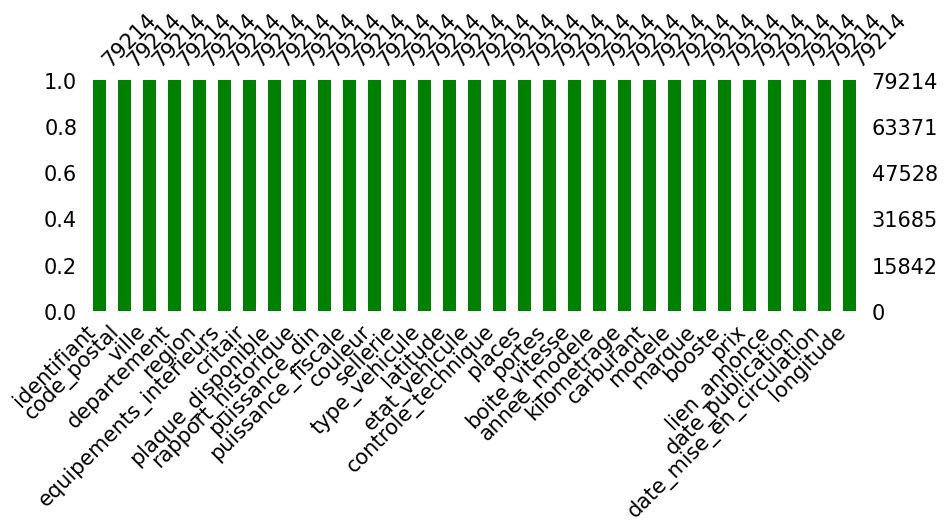

In [24]:
# Visualizing the missing values
import missingno as msno
msno.bar(df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

In [ ]:
pd.set_option('display.max_columns', None)  # Affiche toutes les colonnes
print(df.head(2))  # Affiche les premières lignes du DataFrame

    identifiant     date_publication  \
0  2.915148e+09  2025-01-07 16:17:34   
1  2.906060e+09  2024-12-19 12:33:00   

                                      lien_annonce     prix        booste  \
0  https://www.leboncoin.fr/ad/voitures/2915147681  11490.0  non_specifie   
1  https://www.leboncoin.fr/ad/voitures/2906060394  24990.0           1.0   

     marque    modele carburant  kilometrage annee_modele boite_vitesse  \
0       bmw   serie 1   Essence      99500.0         2013      Manuelle   
1  mercedes  classe a    Diesel      89785.0         2020   Automatique   

  portes places controle_technique date_mise_en_circulation  etat_vehicule  \
0      5      5               2027                  05/2013  Non endommagé   
1      5      5       non_specifie                  07/2020   non_specifie   

  type_vehicule      sellerie couleur puissance_fiscale puissance_din  \
0       Berline     Alcantara   Blanc              7 Cv        136 Ch   
1       Berline  non_specifie    Gris   

### Preparation pour Statistiques Descriptives

In [26]:
# Étape 10 : Suppression des colonnes inutiles
# Supprimer 'identifiant' et 'lien_annonce'
df_cleaned = df.drop(columns=['identifiant', 'lien_annonce'], errors='ignore')

In [27]:
# Étape 11 : Transformation en booléens
# Transformer 'booste', 'rapport_historique', 'plaque_disponible', 'equipements_interieurs' en booléens
colonnes_bool = ['booste', 'rapport_historique', 'plaque_disponible', 'equipements_interieurs']
for col in colonnes_bool:
    df_cleaned[col] = df_cleaned[col].apply(lambda x: False if x == 'non_specifie' else True)

In [28]:
# Étape 12 : Conversion des colonnes numériques textuelles
# Convertir 'puissance_fiscale' et 'puissance_din' en numériques
colonnes_numeriques = ['puissance_fiscale', 'puissance_din']
for col in colonnes_numeriques:
    df_cleaned[col] = df_cleaned[col].str.replace(' Cv', '').str.replace(' Ch', '').astype(float)

In [29]:
# Étape 13 : Transformation des dates
# Convertir 'date_publication' et 'date_mise_en_circulation' en datetime
df_cleaned['date_publication'] = pd.to_datetime(df_cleaned['date_publication'], errors='coerce')
df_cleaned['date_mise_en_circulation'] = pd.to_datetime(df_cleaned['date_mise_en_circulation'], format='%m/%Y', errors='coerce')

In [30]:
# Étape 14 : Création d'indicateurs dérivés
# Calculer l'âge du véhicule
current_year = pd.Timestamp.now().year
df_cleaned['age_vehicule'] = current_year - df_cleaned['date_mise_en_circulation'].dt.year

In [31]:
# Calculer le prix par kilomètre
df_cleaned['prix_par_km'] = df_cleaned['prix'] / df_cleaned['kilometrage']
df_cleaned['prix_par_km'] = df_cleaned['prix_par_km'].replace([np.inf, -np.inf], np.nan)  # Gérer les divisions par zéro

In [32]:
df_cleaned = pd.DataFrame(df_cleaned)
df_cleaned.to_csv('Data/df_cleaned.csv', index=False)

## **3. Comprendre les variables**

In [209]:
df_cleaned = pd.read_csv('Data/df_cleaned.csv')
df_cleaned.head(2)

,date_publication,prix,booste,marque,modele,carburant,kilometrage,annee_modele,boite_vitesse,portes,places,controle_technique,date_mise_en_circulation,etat_vehicule,type_vehicule,sellerie,couleur,puissance_fiscale,puissance_din,rapport_historique,plaque_disponible,critair,equipements_interieurs,region,departement,ville,code_postal,latitude,longitude,age_vehicule,prix_par_km
0,2025-01-07 16:17:34,11490.0,False,bmw,serie 1,Essence,99500.0,2013,Manuelle,5,5,2027,2013-05-01,Non endommagé,Berline,Alcantara,Blanc,7.0,136.0,False,False,non_specifie,True,Alsace,Bas-Rhin,Bischwiller,67240,48.76828,7.85898,12.0,0.115477
1,2024-12-19 12:33:00,24990.0,True,mercedes,classe a,Diesel,89785.0,2020,Automatique,5,5,non_specifie,2020-07-01,non_specifie,Berline,non_specifie,Gris,6.0,116.0,False,True,2,False,Alsace,Bas-Rhin,Obernai,67210,48.46231,7.48467,5.0,0.278332


In [210]:
df_cleaned.shape

(79214, 31)

###  Colonnes

In [211]:
# colonnes du Dataset
df_cleaned.columns

Index(['date_publication', 'prix', 'booste', 'marque', 'modele', 'carburant',
       'kilometrage', 'annee_modele', 'boite_vitesse', 'portes', 'places',
       'controle_technique', 'date_mise_en_circulation', 'etat_vehicule',
       'type_vehicule', 'sellerie', 'couleur', 'puissance_fiscale',
       'puissance_din', 'rapport_historique', 'plaque_disponible', 'critair',
       'equipements_interieurs', 'region', 'departement', 'ville',
       'code_postal', 'latitude', 'longitude', 'age_vehicule', 'prix_par_km'],
      dtype='object')

### Résumé statistique

In [212]:
# Dataset Describe
df_cleaned.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date_publication,79214,64189,2023-11-09 04:54:09,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prix,79214.0,NaN,NaN,NaN,20991.178832,64737.696756,1.0,9800.0,16890.0,25890.0,12345678.0
booste,79214,2,False,47778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marque,79214,82,peugeot,14169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
modele,79214,641,autres,11404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carburant,79214,7,Essence,33888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kilometrage,79214.0,NaN,NaN,NaN,89123.959111,76427.210339,0.0,27829.25,71000.0,131500.0,999999.0
annee_modele,79214.0,NaN,NaN,NaN,2016.928094,7.514728,1960.0,2014.0,2019.0,2022.0,2025.0
boite_vitesse,79214,2,Automatique,39816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
portes,79214,5,5,67037,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###  Description des Variables

Ce dataset contient des informations détaillées sur des annonces de véhicules d'occasion provenant de Leboncoin. Les variables incluses permettent une analyse approfondie des caractéristiques des véhicules, des prix, et des informations géographiques associées aux annonces.

<b>Informations sur les attributs : </b>

**date_publication** : **Date et heure de la publication de l'annonce.**

**prix** : **Prix du véhicule en euros.**

**booste** : **Indique si l'annonce est mise en avant par le vendeur (booléen).**

**marque** : **Marque du véhicule (ex : BMW, Renault).**

**modele** : **Modèle spécifique du véhicule (ex : Clio, Golf).**

**carburant** : **Type de carburant utilisé (ex : Essence, Diesel, Hybride).**

**kilometrage** : **Distance parcourue par le véhicule en kilomètres.**

**annee_modele** : **Année du modèle du véhicule.**

**boite_vitesse** : **Type de boîte de vitesses (ex : Manuelle, Automatique).**

**portes : Nombre de portes du véhicule.**

**places : Nombre de places dans le véhicule.**

**controle_technique : Validité ou date de la fin du contrôle technique.**

**date_mise_en_circulation : Date de la première mise en circulation du véhicule.**

**etat_vehicule : État du véhicule (ex : Non endommagé, Endommagé, non spécifié).**

**type_vehicule : Catégorie du véhicule (ex : Berline, SUV).**

**sellerie : Type de sellerie intérieure (ex : Cuir, Tissu, non spécifié).**

**couleur : Couleur extérieure du véhicule.**

**puissance_fiscale : Puissance fiscale du véhicule en chevaux (CV).**

**puissance_din : Puissance DIN du véhicule en chevaux (Ch).**

**rapport_historique : Indique si un rapport d’historique est disponible (booléen).**

**plaque_disponible : Indique si la plaque d’immatriculation est visible dans l'annonce (booléen).**

**critair : Classe Crit'Air du véhicule (1, 2, 3, 4, 5, non spécifié).**

**equipements_interieurs : Indique si des équipements intérieurs sont listés (booléen).**

**region : Région où le véhicule est mis en vente.**

**departement : Département où le véhicule est mis en vente.**

**ville : Ville où le véhicule est mis en vente.**

**code_postal : Code postal de la ville associée à l'annonce.**

**latitude : Latitude géographique de la localisation.**

**longitude : Longitude géographique de la localisation.**

**age_vehicule : Âge du véhicule en années, calculé à partir de l'année actuelle et de la date de mise en circulation.**

**prix_par_km : Prix du véhicule divisé par son kilométrage, indicateur du coût par kilomètre.**

In [213]:
# print the unique value
df_cleaned.nunique()

date_publication            64189
prix                         5567
booste                          2
marque                         82
modele                        641
carburant                       7
kilometrage                 32719
annee_modele                   66
boite_vitesse                   2
portes                          5
places                          7
controle_technique             19
date_mise_en_circulation      735
etat_vehicule                   3
type_vehicule                  10
sellerie                       75
couleur                        18
puissance_fiscale              89
puissance_din                 513
rapport_historique              2
plaque_disponible               2
critair                         8
equipements_interieurs          2
region                         24
departement                    67
ville                        5618
code_postal                  3075
latitude                     9175
longitude                    9268
age_vehicule  

## **4. EAD**

#### **C'est quoi l'EAD ?**
* L'analyse exploratoire des données (AED) est une étape critique du processus de science des données qui implique l'analyse et la compréhension des données. L'objectif premier de l'AED est de mieux comprendre les données, de découvrir des schémas et de détecter des relations et des tendances. Ce processus itératif permet d'identifier les valeurs aberrantes, les valeurs manquantes et d'autres problèmes susceptibles d'avoir un impact sur l'analyse et la modélisation des données.

### **4.1 Distribution du prix**

La description des prix montre des prix allant de 1 à 12 345 678 d'euros pour une médiane de 16 890 euros, ce qui indique clairement des outliers.

<Axes: ylabel='prix'>

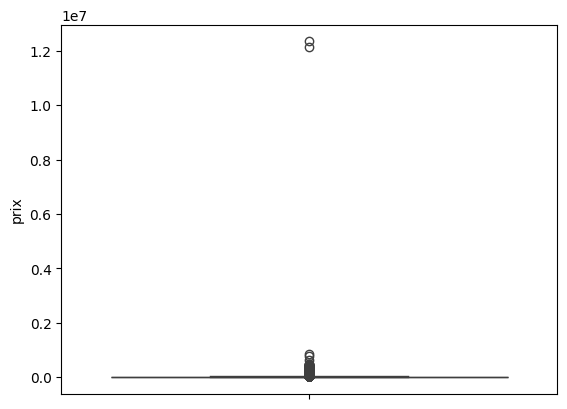

In [214]:
#Regardons les prix de plus près
sns.boxplot( y='prix', data=df_cleaned)

Les petits prix peuvent indiquer une location plutôt qu'un achat, mais la formulation des offres sur leboncoin ne permet pas toujours de distinguer.\
On se fixe un prix minimum d'achat de 1 000 euros et un prix maximum de 500 000 euros.

In [215]:
#Supprimer les lignes dont les prix sont inférieurs à 500 et supérieures à 500 000 euros
df_cleaned=df_cleaned[~((df_cleaned["prix"]>500000) | (df_cleaned["prix"]<1000))]
print("Nombres de lignes supprimées:", 79214-df_cleaned.shape[0])
print("Nouvelle taille du dataset:", df_cleaned.shape)
df_cleaned.describe(include='all')["prix"].T

Nombres de lignes supprimées: 901
Nouvelle taille du dataset: (78313, 31)


count      78313.000000
unique              NaN
top                 NaN
freq                NaN
mean       20884.303819
std        20061.841703
min         1000.000000
25%         9990.000000
50%        16990.000000
75%        25987.000000
max       489990.000000
Name: prix, dtype: float64

On constate que les valeurs des quartiles restent les mêmes.

<Axes: ylabel='prix'>

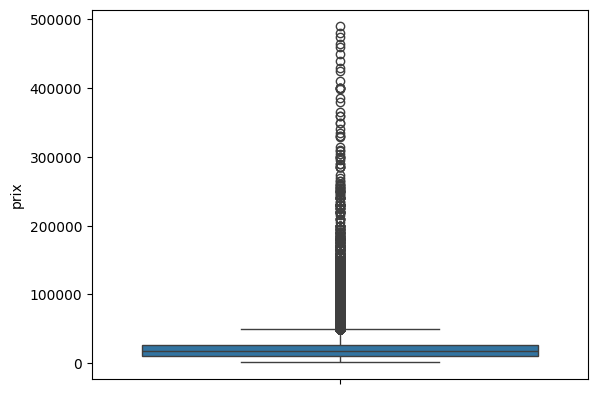

In [216]:
#Regardons les prix corrigés de plus près
sns.boxplot( y='prix', data=df_cleaned)

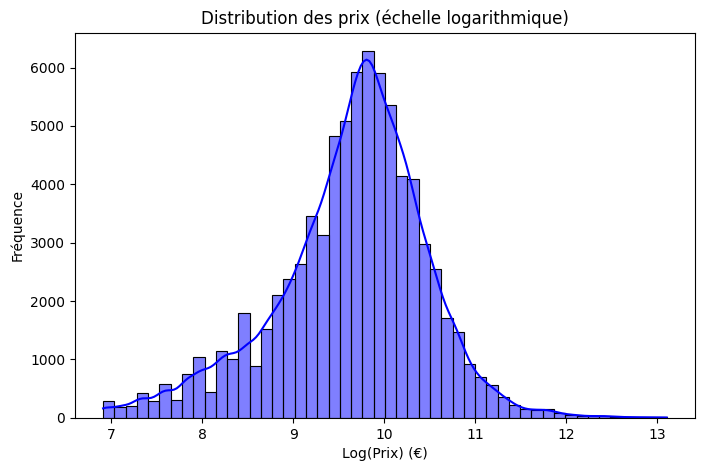

In [217]:
# Ajouter une colonne pour le logarithme des prix (en évitant les erreurs avec les valeurs nulles ou négatives)
df_cleaned['log_prix'] = np.log1p(df_cleaned['prix'])  # log(1 + prix) pour éviter log(0)

# Visualiser la distribution après transformation
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['log_prix'], bins=50, kde=True, color='blue')
plt.title('Distribution des prix (échelle logarithmique)')
plt.xlabel('Log(Prix) (€)')
plt.ylabel('Fréquence')
plt.savefig(os.path.join("graphs", 'Distribution des prix (échelle logarithmique).png'))
plt.show()


**Observation:**

* La distribution presente clairement une forme en cloche type d'une distribution normale. Cela nous facilitera l'interprétation et l'analyse des prix.
* Le pic principal est autour de la valeur log(10), ce qui correspond à environ 22 000 € 

### **4.2 Prix par kilomètre**

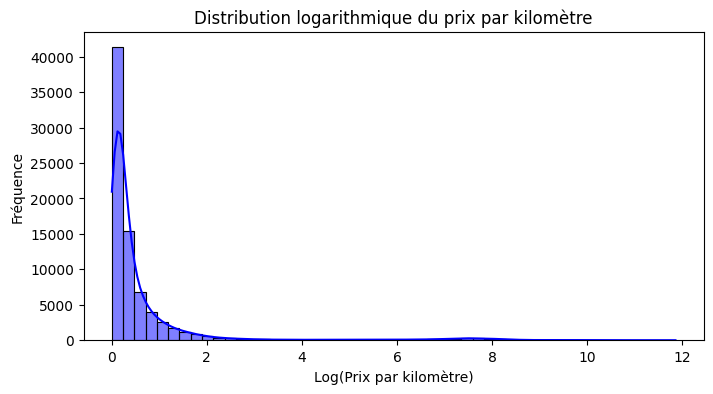

In [218]:
df_cleaned['log_prix_par_km'] = np.log1p(df_cleaned['prix_par_km'])
plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned['log_prix_par_km'], bins=50, kde=True, color='blue')
plt.title('Distribution logarithmique du prix par kilomètre')
plt.xlabel('Log(Prix par kilomètre)')
plt.ylabel('Fréquence')
plt.savefig(os.path.join("graphs", 'Distribution logarithmique du prix par kilomètre.png'))
plt.show()

**Observation:**

* Le graphique montre une distribution relativement asymétrique vers la gauche, ce qui indique que la majorité des véhicules ont un prix par kilomètre faible. Cependant, la présence d'une traîne à droite montre qu'il existe des véhicules avec un prix par kilomètre très élevé (outliers), ce qui peut influencer les statistiques globales.

* Nous allons donc creer des categories de prix par klm pour mieux observer les differents vehicules

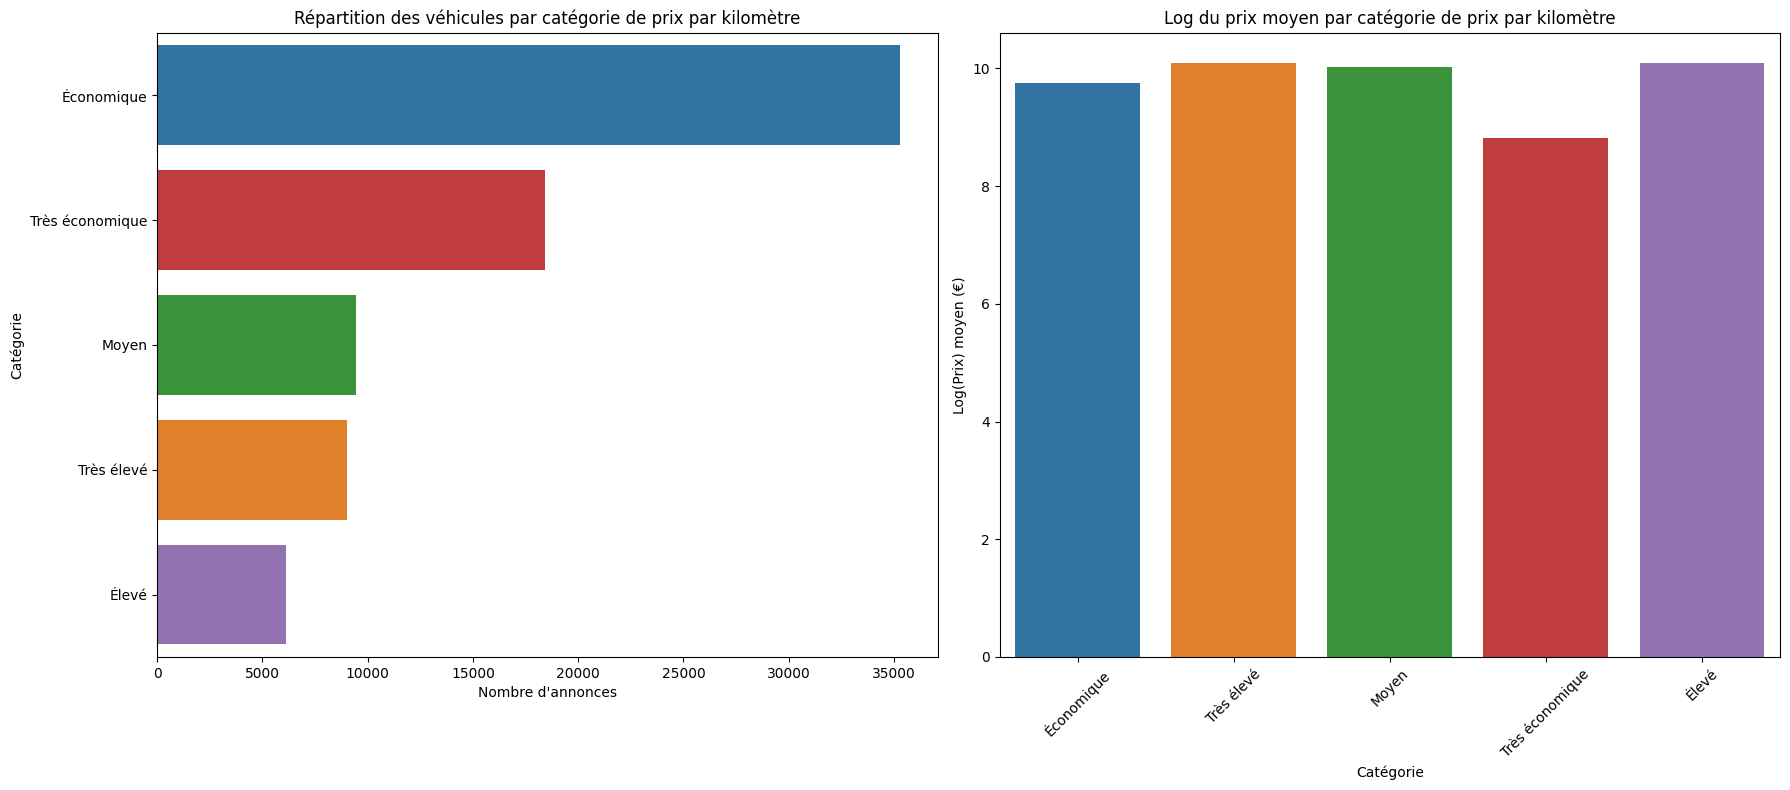

In [219]:
# Créer des catégories de prix par kilomètre
def categoriser_prix_par_km(prix_par_km):
    if prix_par_km <= 0.1:
        return 'Très économique'
    elif 0.1 < prix_par_km <= 0.5:
        return 'Économique'
    elif 0.5 < prix_par_km <= 1.0:
        return 'Moyen'
    elif 1.0 < prix_par_km <= 2.0:
        return 'Élevé'
    else:
        return 'Très élevé'

df_cleaned['categorie_prix_par_km'] = df_cleaned['prix_par_km'].apply(categoriser_prix_par_km)

# Créer une figure avec deux axes côte à côte
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Graphique 1 : Répartition des catégories
sns.countplot(
    data=df_cleaned, 
    y='categorie_prix_par_km', 
    order=df_cleaned['categorie_prix_par_km'].value_counts().index, hue='categorie_prix_par_km', legend=False, 
    ax=axes[0]
)
axes[0].set_title('Répartition des véhicules par catégorie de prix par kilomètre')
axes[0].set_xlabel('Nombre d\'annonces')
axes[0].set_ylabel('Catégorie')
# Graphique 2 : Log du prix moyen par catégorie
sns.barplot(
    data=df_cleaned, 
    x='categorie_prix_par_km', 
    y='log_prix', 
    estimator='mean', errorbar=None, hue='categorie_prix_par_km', legend=False, 
    ax=axes[1]
)
axes[1].set_title('Log du prix moyen par catégorie de prix par kilomètre')
axes[1].set_xlabel('Catégorie')
axes[1].set_ylabel('Log(Prix) moyen (€)')
axes[1].tick_params(axis='x', rotation=45)

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()
plt.savefig(os.path.join("graphs", 'Répartition des véhicules par catégorie de prix par kilomètre.png'))
plt.show()

**Graphique de gauche** : Répartition des véhicules par catégorie de prix par kilomètre

* La majorité des annonces se concentrent dans les catégories Économique et Très économique, ce qui est attendu pour des véhicules courants.
* Les catégories Élevé et Très élevé contiennent un nombre relativement faible d'annonces, suggérant qu'elles représentent des cas plus rares ou des véhicules de luxe.

* Ces résultats confirment bien que le marché de l'occasion est dominé par des véhicules accessibles en termes de coût par kilomètre. Les véhicules dans les catégories élevées pourraient correspondre à des modèles premium, neufs, ou mal catégorisés (outliers).

**Graphique de droite** : Log du prix moyen par catégorie de prix par kilomètre

* Les catégories Très élevé et Élevé affichent des prix moyens (logarithmiques) plus élevés, comme attendu.
La catégorie Très économique a un log du prix moyen légèrement inférieur à celui des catégories intermédiaires (par exemple, Moyen), ce qui montre une certaine cohérence dans le lien entre le prix par kilomètre et le prix global.

* La relation entre la catégorie de prix par kilomètre et le log du prix semble globalement linéaire, avec des variations marginales dues à des facteurs supplémentaires comme la marque ou l'année.

### **4.3 Relation entre log_prix et kilométrage en fonction du type de carburant**

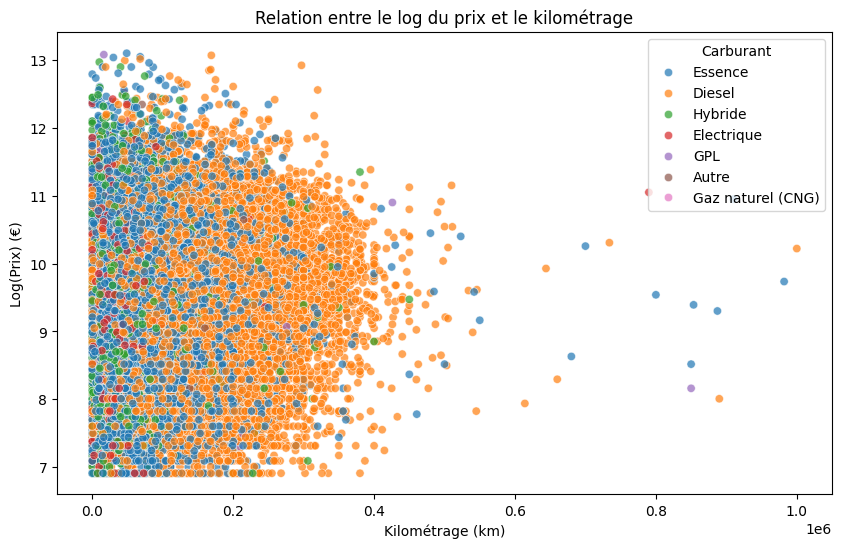

In [220]:
# 1.3 Relation entre log_prix et kilométrage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='kilometrage', y='log_prix', hue='carburant', alpha=0.7)
plt.title('Relation entre le log du prix et le kilométrage')
plt.xlabel('Kilométrage (km)')
plt.ylabel('Log(Prix) (€)')
plt.legend(title='Carburant')
plt.savefig(os.path.join("graphs", 'Relation entre le log du prix et le kilométrage.png'))
plt.show()

**Observatioons:**

* Une tendance décroissante est visible : en général, plus le kilométrage est élevé, plus le prix (logarithmique) est faible. Cependant, cette relation semble non linéaire et devient moins claire pour les kilométrages élevés.

* Le diesel (orange) domine largement les points de données, ce qui reflète sa popularité sur le marché des véhicules d'occasion. Les véhicules électriques et hybrides (vert et rose) semblent se concentrer sur des kilométrages faibles et des prix plus élevés, indiquant des modèles récents ou haut de gamme.

### **4.4 Relation entre log_prix et âge du véhicule**

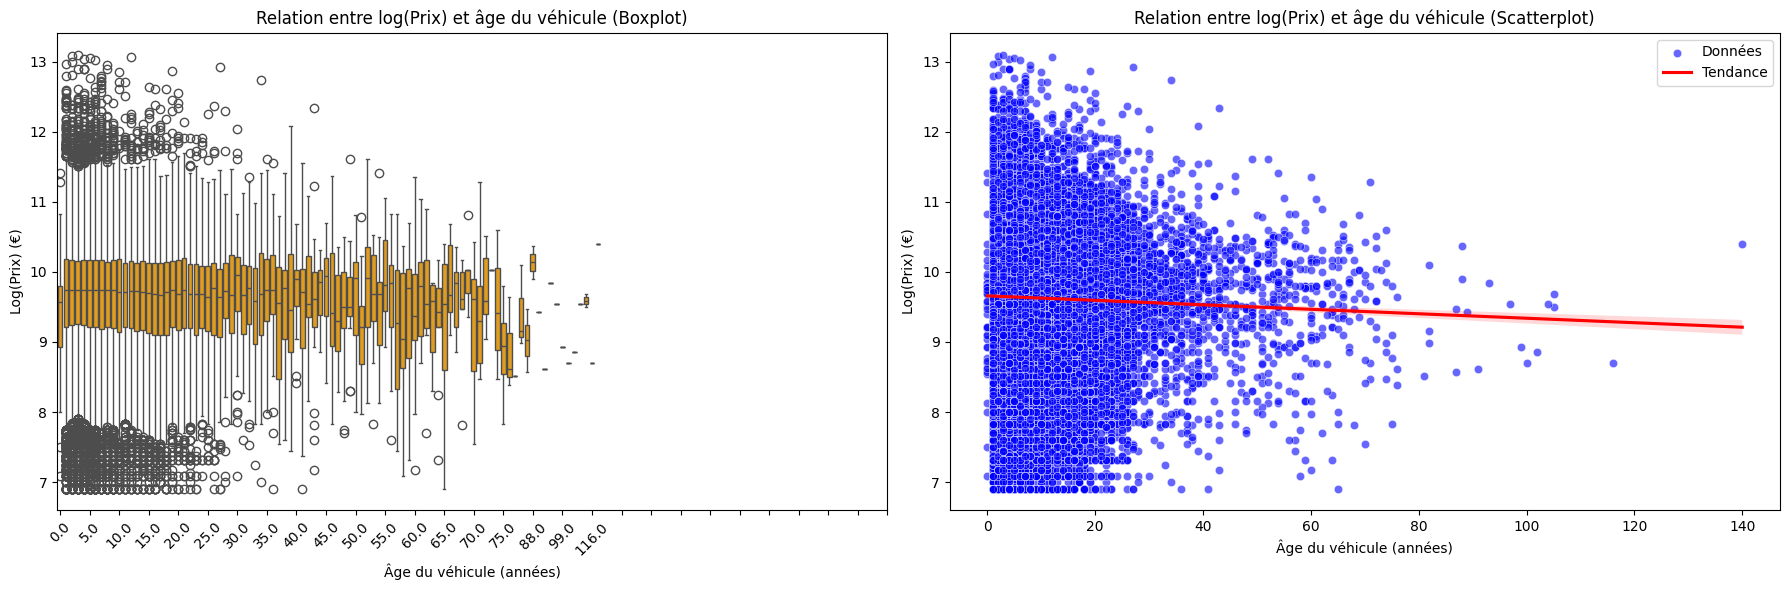

In [221]:
# Initialiser la figure avec deux sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Boxplot : Relation entre log_prix et âge du véhicule
sns.boxplot(data=df_cleaned, x='age_vehicule', y='log_prix', color='orange', ax=axes[0])
axes[0].set_title('Relation entre log(Prix) et âge du véhicule (Boxplot)')
axes[0].set_xlabel('Âge du véhicule (années)')
axes[0].set_ylabel('Log(Prix) (€)')
axes[0].set_xticks(range(0, int(df_cleaned['age_vehicule'].max()) + 1, 5))  # Réduction des ticks
axes[0].tick_params(axis='x', rotation=45)

# Scatterplot avec tendance
sns.scatterplot(data=df_cleaned, x='age_vehicule', y='log_prix', alpha=0.6, color='blue', ax=axes[1], label='Données')
sns.regplot(data=df_cleaned, x='age_vehicule', y='log_prix', scatter=False, color='red', ax=axes[1], label='Tendance')
axes[1].set_title('Relation entre log(Prix) et âge du véhicule (Scatterplot)')
axes[1].set_xlabel('Âge du véhicule (années)')
axes[1].set_ylabel('Log(Prix) (€)')
axes[1].legend()

# Ajustement des espaces entre les graphiques
plt.tight_layout()
plt.savefig(os.path.join("graphs", 'Relation entre log(Prix) et âge du véhicule.png'))
plt.show()

**Observation:**

* Le Boxplot laisse apparaitre une forte concentration des prix pour les véhicules âgés de moins de 10 ans avec moins de variabilité. Les voitures plus anciennes tendent à avoir un prix log réduit, ce qui reflète la dépréciation naturelle des voitures avec le temps.

* Le graphe de nuage des points vient confirmer la corrélation globale entre l'âge et le log du prix observable dadns le graphe 1, avec la ligne de tendance en rouge. La pente négative de cette ligne confirme que le prix diminue avec l'âge. Les valeurs aberrantes sont donc identifiées par des points dispersés au-dessus de la tendance.

### **4.5 Variables catégoriques : marque**

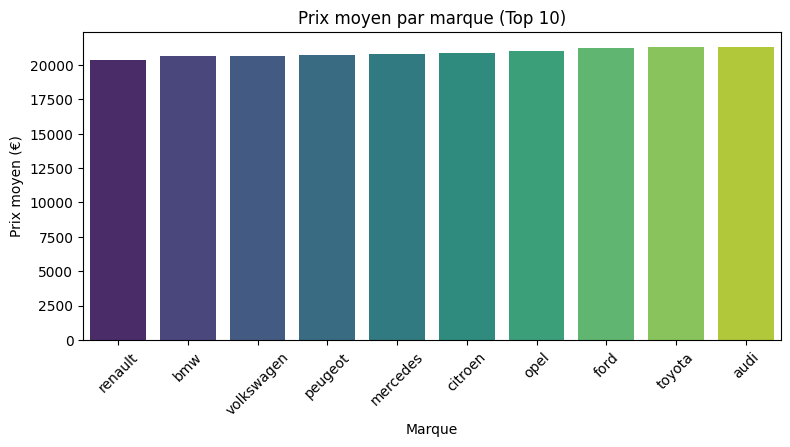

In [222]:
plt.figure(figsize=(9, 4))
marques_top = df_cleaned['marque'].value_counts().head(10).index
# Calculer le prix moyen pour les marques top 10
prix_moyen_par_marque = df_cleaned[df_cleaned['marque'].isin(marques_top)].groupby('marque')['prix'].mean().sort_values()

# Tracer le graphique trié
sns.barplot(x=prix_moyen_par_marque.index, y=prix_moyen_par_marque.values, palette='viridis', hue=prix_moyen_par_marque.index)
plt.title('Prix moyen par marque (Top 10)')
plt.xlabel('Marque')
plt.ylabel('Prix moyen (€)')
plt.xticks(rotation=45)
plt.savefig(os.path.join("graphs", 'Prix moyen par marque (Top 10).png'))
plt.show()

**Observations:**

* Les marques ont des prix moyens relativement proches, indiquant une gamme de prix homogène pour les véhicules les plus populaires.
* Les marques comme BMW et Mercedes sont légèrement plus chères que les autres, ce qui reflète leur positionnement premium.

### **4.6 Analyse par Region**

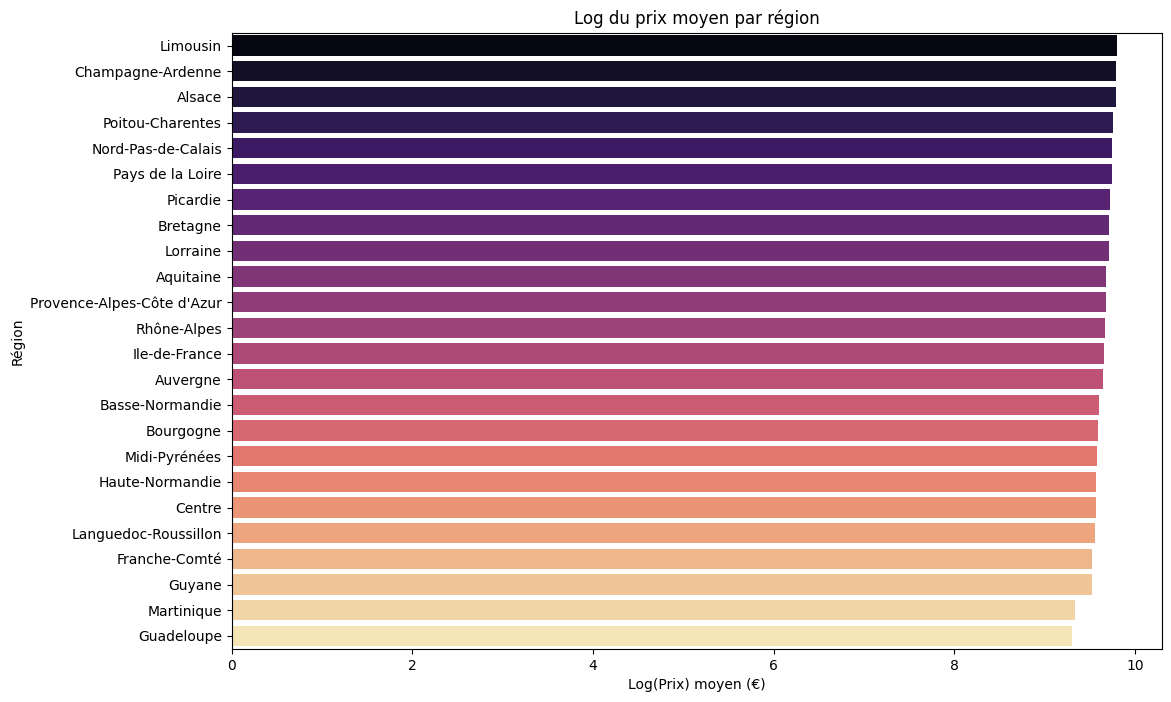

In [223]:
# Log du prix moyen par région
plt.figure(figsize=(12, 8))
prix_region = df_cleaned.groupby('region')['log_prix'].mean().sort_values(ascending=False)
sns.barplot(x=prix_region.values, y=prix_region.index, palette='magma', hue=prix_region.index)
plt.title('Log du prix moyen par région')
plt.xlabel('Log(Prix) moyen (€)')
plt.ylabel('Région')
plt.savefig(os.path.join("graphs", 'Log du prix moyen par région.png'))
plt.show()

**Observations:**

* Classement des régions : Les régions situées en bas de l'échelle (ex. Guadeloupe, Martinique) semblent avoir les prix moyens les plus élevés (dans leur échelle logarithmique). Cela pourrait refléter des facteurs spécifiques comme la localisation géographique, les coûts d'importation ou une offre plus restreinte.

* Homogénéité des prix : Les régions métropolitaines comme le Limousin ou la Champagne-Ardenne se trouvent en haut de l'échelle, ce qui peut indiquer que les prix moyens y sont généralement plus bas. Ce constat pourrait être expliqué par un marché plus compétitif ou un pouvoir d'achat plus limité.

### **4.6 Analyse des annonces boostées**

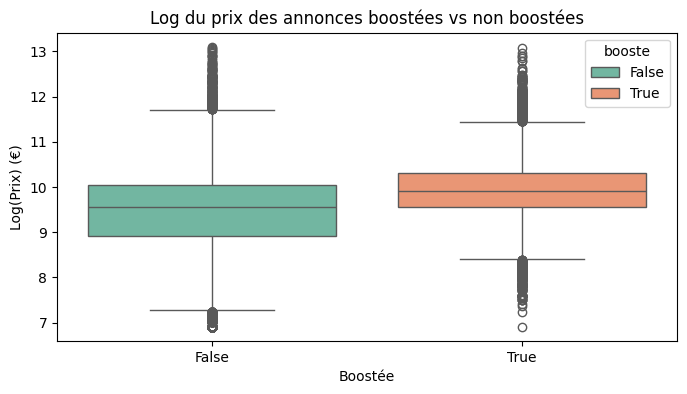

In [224]:
# Analyse des annonces boostées
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_cleaned, x='booste', y='log_prix', palette='Set2', hue='booste')
plt.title('Log du prix des annonces boostées vs non boostées')
plt.xlabel('Boostée')
plt.ylabel('Log(Prix) (€)')
plt.savefig(os.path.join("graphs", 'Log du prix des annonces boostées vs non boostées.png'))
plt.show()

### **4.7 Analyse de la relation entre plaque_disponible et log_prix**

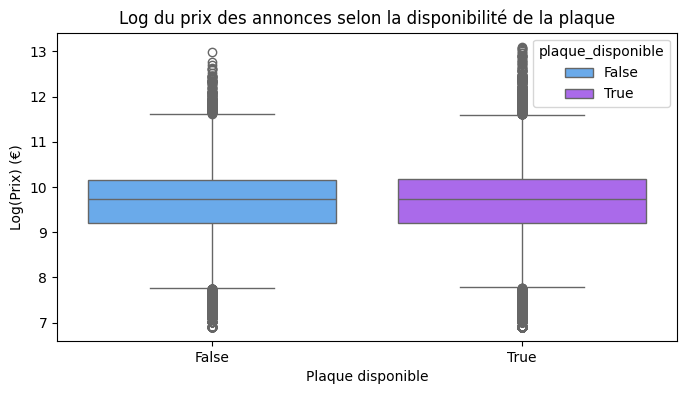

In [225]:
# Relation entre plaque_disponible et log_prix
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_cleaned, x='plaque_disponible', y='log_prix', palette='cool',hue='plaque_disponible')
plt.title('Log du prix des annonces selon la disponibilité de la plaque')
plt.xlabel('Plaque disponible')
plt.ylabel('Log(Prix) (€)')
plt.savefig(os.path.join("graphs", 'Log du prix des annonces selon la disponibilité de la plaque.png'))
plt.show()

* Différence marginale entre les catégories : Les distributions des prix des annonces avec une plaque disponible (True) et sans plaque disponible (False) sont très similaires. Cela suggère que la disponibilité de la plaque n'a qu'un impact limité sur le prix des véhicules.

* Variabilité moindre pour les plaques disponibles : Les annonces avec une plaque disponible (True) présentent une boîte légèrement plus resserrée, indiquant une variabilité un peu plus faible des prix dans cette catégorie.

### **4.6 Boxplot de la target (log_prix)**

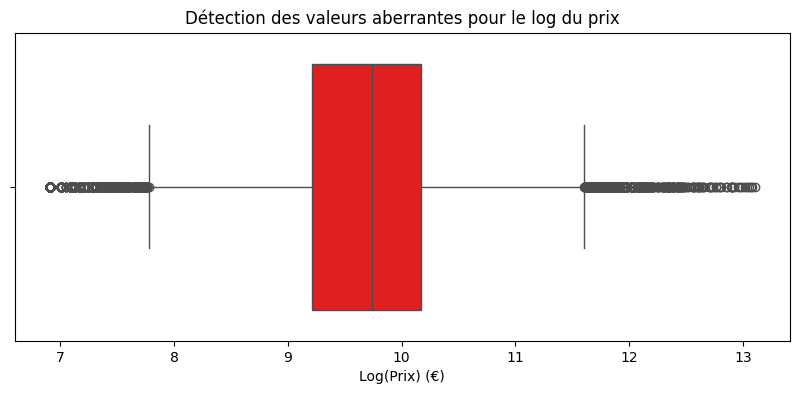

In [226]:
# 5. Détection des valeurs aberrantes
# Boxplot pour identifier les outliers
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_cleaned, x='log_prix', color='red')
plt.title('Détection des valeurs aberrantes pour le log du prix')
plt.xlabel('Log(Prix) (€)')
plt.show()

* Distribution centrale concentrée : La majorité des valeurs pour le log du prix se situe entre 9 et 10, ce qui représente la plage interquartile (IQR), indiquant une forte concentration des prix moyens dans cette fourchette.

* Présence de valeurs aberrantes : Les points situés au-delà des moustaches, en dessous de 8 et au-dessus de 11, indiquent des valeurs aberrantes. Ces annonces peuvent correspondre à des véhicules anormalement bon marché ou chers, nécessitant une analyse plus approfondie.

* Plage étendue des prix : Les moustaches du graphique montrent que la distribution des prix couvre une plage relativement large, bien que les valeurs extrêmes soient peu fréquentes. Cela pourrait refléter la diversité des véhicules proposés dans les annonces.

## **5. Ingénierie des caractéristiques**

* L'ingénierie des caractéristiques est le processus de création de nouvelles caractéristiques à partir de caractéristiques existantes afin d'améliorer les performances d'un modèle d'apprentissage automatique. Il s'agit de transformer des données brutes en une forme plus utile et informative, soit en créant de nouvelles caractéristiques à partir des données existantes, soit en sélectionnant uniquement les caractéristiques les plus pertinentes à partir des données brutes. 
* L'objectif de l'ingénierie des caractéristiques est d'extraire les informations pertinentes des données brutes et de les représenter d'une manière qui puisse être facilement comprise par le modèle d'apprentissage automatique. Le succès d'un modèle d'apprentissage automatique dépend fortement de la qualité des caractéristiques utilisées comme entrées, de sorte que l'ingénierie des caractéristiques joue un rôle important dans les performances du modèle.

In [227]:
# Étape 1 : Identifier les caractéristiques numériques et catégoriques
# Exclure la variable cible 'log_prix'
numerical_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove('log_prix')  # Supprimer la cible

categorical_features = df_cleaned.select_dtypes(include=['object', 'bool']).columns.tolist()

# Ajustements : inclure 'log_prix' dans les variables numériques
numerical_features.append('log_prix')
# Ajustements : déplacer certaines variables des numériques aux catégoriques
categorical_to_categorical = ['portes', 'places', 'critair']
for col in categorical_to_categorical:
    if col in numerical_features:
        numerical_features.remove(col)
        categorical_features.append(col)

# Suppression des colonnes inutiles
numerical_features = [col for col in numerical_features if col not in ['latitude', 'longitude', 'code_postal', 'prix_par_km', 'log_prix_par_km']]

print("Caractéristiques numériques :", numerical_features)
print("Caractéristiques catégoriques :", categorical_features)

Caractéristiques numériques : ['prix', 'kilometrage', 'annee_modele', 'puissance_fiscale', 'puissance_din', 'age_vehicule', 'log_prix']
Caractéristiques catégoriques : ['date_publication', 'booste', 'marque', 'modele', 'carburant', 'boite_vitesse', 'portes', 'places', 'controle_technique', 'date_mise_en_circulation', 'etat_vehicule', 'type_vehicule', 'sellerie', 'couleur', 'rapport_historique', 'plaque_disponible', 'critair', 'equipements_interieurs', 'region', 'departement', 'ville', 'categorie_prix_par_km']


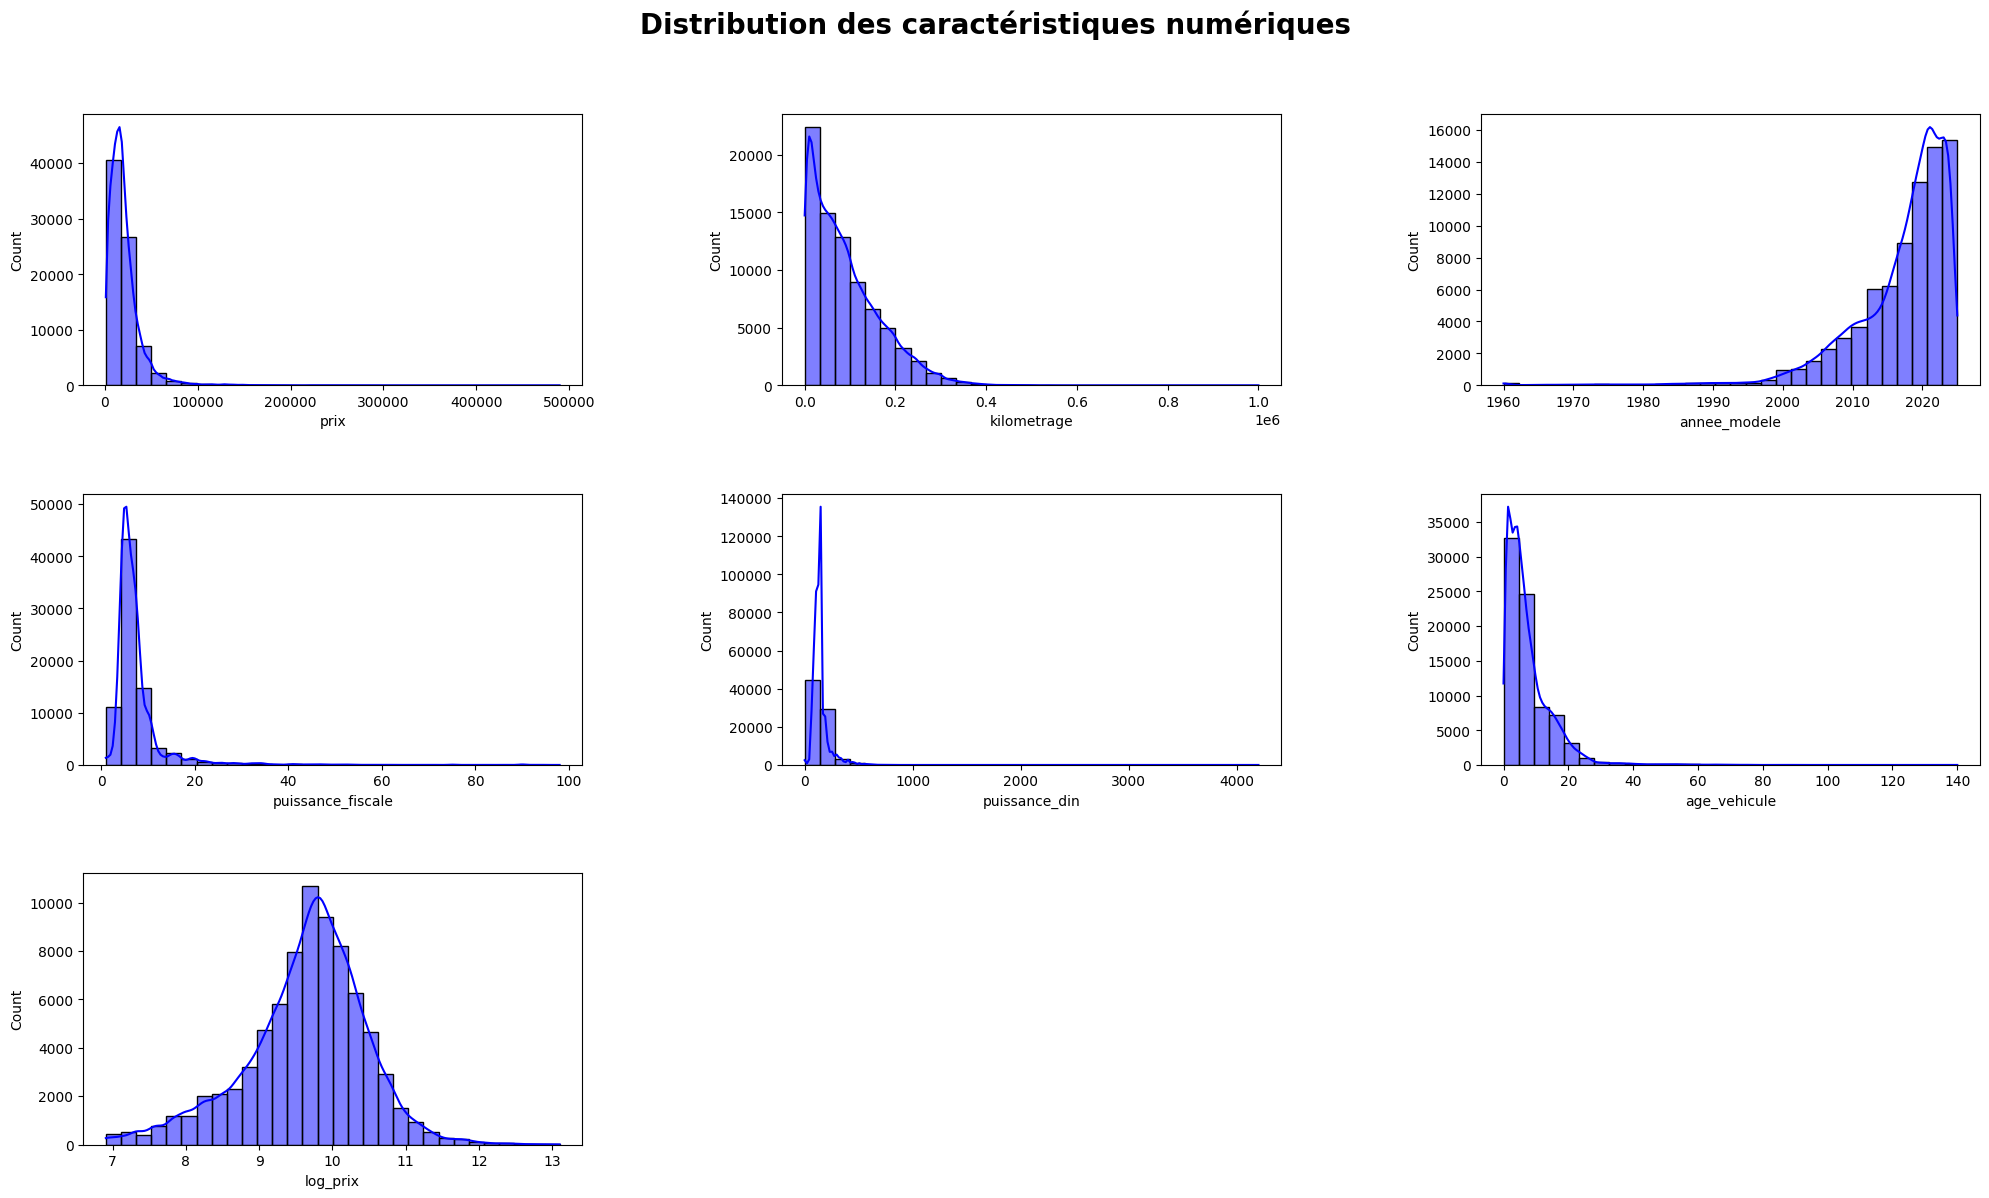

In [228]:
# Étape 2 : Visualiser la distribution des variables numériques
plt.figure(figsize=(20, 15))
plt.suptitle('Distribution des caractéristiques numériques', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)  # Ajuster selon le nombre de caractéristiques
    sns.histplot(df_cleaned[col], kde=True, color='blue', bins=30)
    plt.xlabel(col)
    plt.tight_layout()

plt.subplots_adjust(top=0.95, hspace=0.4, wspace=0.4)
plt.show()

* prix : Distribution très asymétrique, avec des valeurs élevées concentrées sur l'extrémité droite.
La variable log-transformée (log_prix) est déjà utilisée pour compenser cette asymétrie. Il est inutile de conserver prix pour la modélisation si log_prix est mieux adaptée.

* kilometrage : Distribution asymétrique, avec beaucoup de valeurs faibles et quelques valeurs élevées.
Les valeurs élevées (par exemple, > 300 000 km) semblent réalistes mais pourraient être influencées par des véhicules utilitaires ou anciens.

* puissance_fiscale et puissance_din : Les valeurs élevées pour puissance_din (> 400) sont probablement rares mais légitimes (véhicules haut de gamme). Il est important de vérifier si elles influencent les résultats et envisager un clipping plus strict.

* age_vehicule : Distribution naturellement asymétrique (plus de véhicules jeunes). Il pourrait être utile de vérifier les outliers (> 50 ans, par exemple) et de voir si ces véhicules sont vraiment présents dans les données ou mal enregistrés.

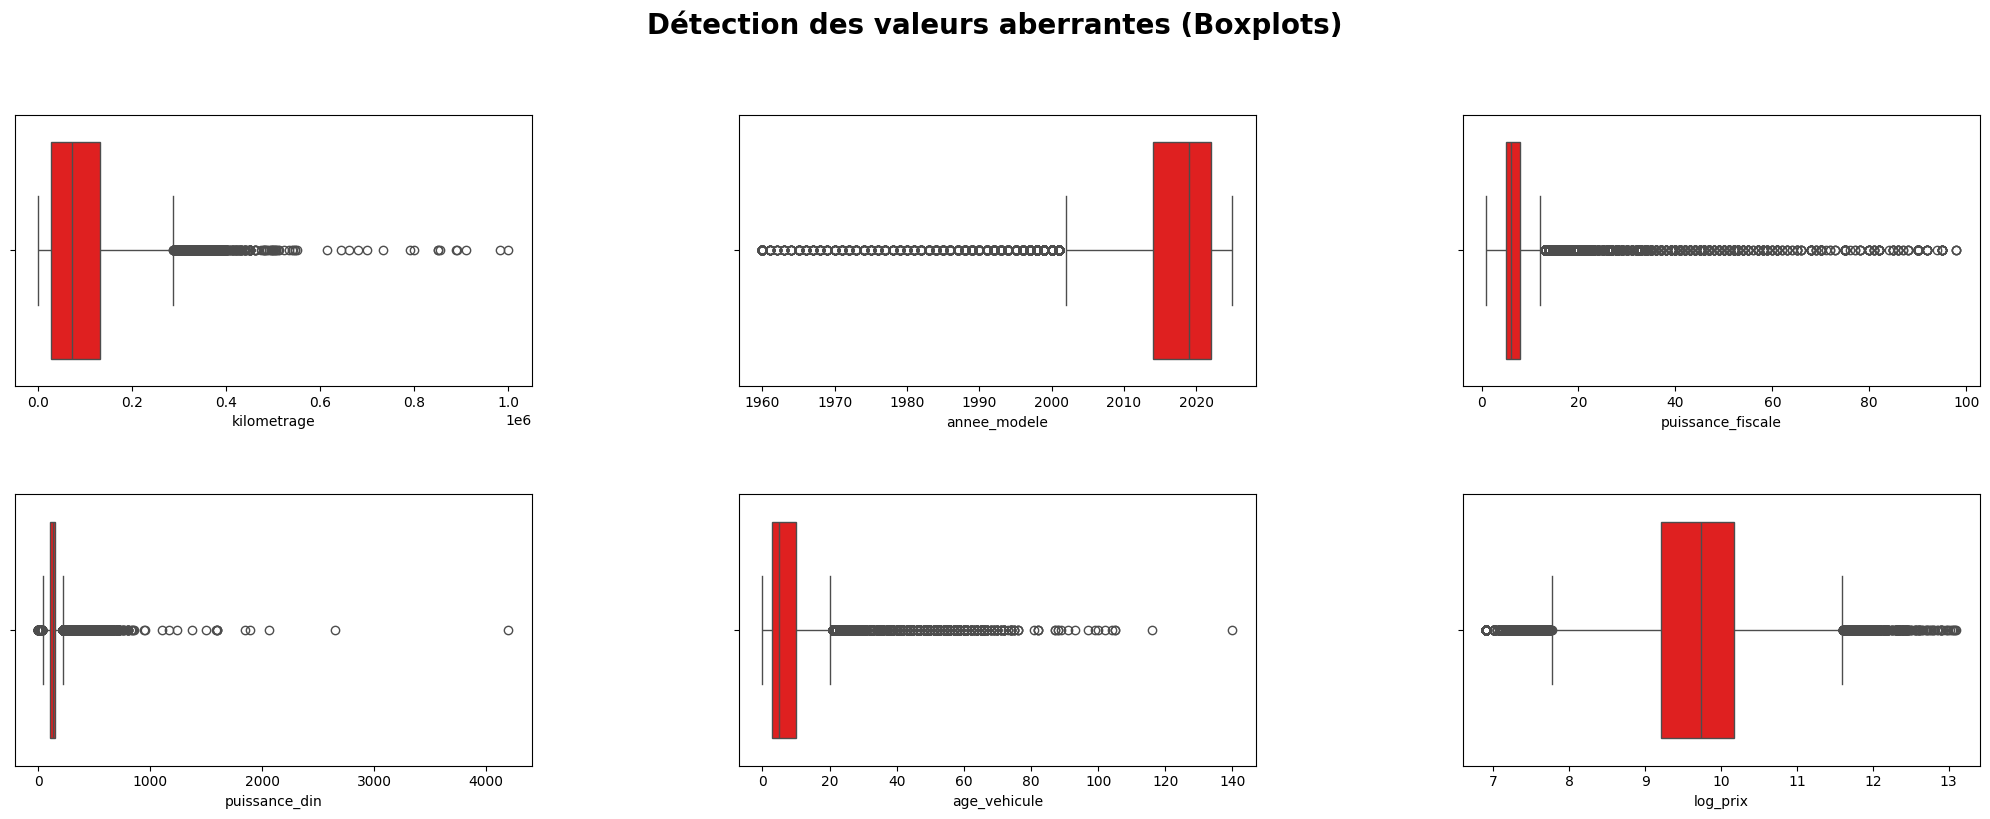

In [229]:
# Supprimer prix
numerical_features.remove('prix')

# Visualisation des valeurs aberrantes pour les caractéristiques numériques
plt.figure(figsize=(20, 15))
plt.suptitle('Détection des valeurs aberrantes (Boxplots)', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df_cleaned, x=col, color='red')
    plt.xlabel(col)
    plt.tight_layout()

plt.subplots_adjust(top=0.95, hspace=0.4, wspace=0.4)
plt.show()

* Les outliers identifiés semblent majoritairement légitimes pour certaines caractéristiques, comme l'année modèle ou l'âge du véhicule.
* Cependant, les variables comme le kilométrage, les puissances (fiscale et DIN), et log_prix nécessitent un clipping pour éviter de fausser la modélisation. nous allons maintenant appliquer le clipping pour ces variables et vérifier l'effet sur les distributions.

In [230]:
# Ajustements avant le traitement des outliers
# Suppression des outliers identifiés comme non pertinents pour certaines colonnes
outlier_cols_to_exclude = ['annee_modele', 'age_vehicule']
numerical_features_for_clipping = [col for col in numerical_features if col not in outlier_cols_to_exclude]

* Comme nous disposons d'un nombre limité de points de données, nous ne nous contentons pas de supprimer les valeurs aberrantes, mais nous utilisons la méthode de l'écrêtage.

* Dans cette méthode, nous fixons un plafond à nos données aberrantes, ce qui signifie que si une valeur est supérieure ou inférieure à un certain seuil, toutes les valeurs seront considérées comme aberrantes. Cette méthode remplace les valeurs qui se situent en dehors d'une plage spécifiée par la valeur minimale ou maximale de cette plage.

In [231]:
# Étape 4 : Traitement des valeurs aberrantes
def clip_outliers(df, numerical_features):
    for col in numerical_features:
        # Définir les limites avec la méthode IQR
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Remplacer les valeurs aberrantes par les limites
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

# Appliquer la méthode de clipping sur les caractéristiques numériques pertinentes
df_cleaned = clip_outliers(df_cleaned, numerical_features_for_clipping)

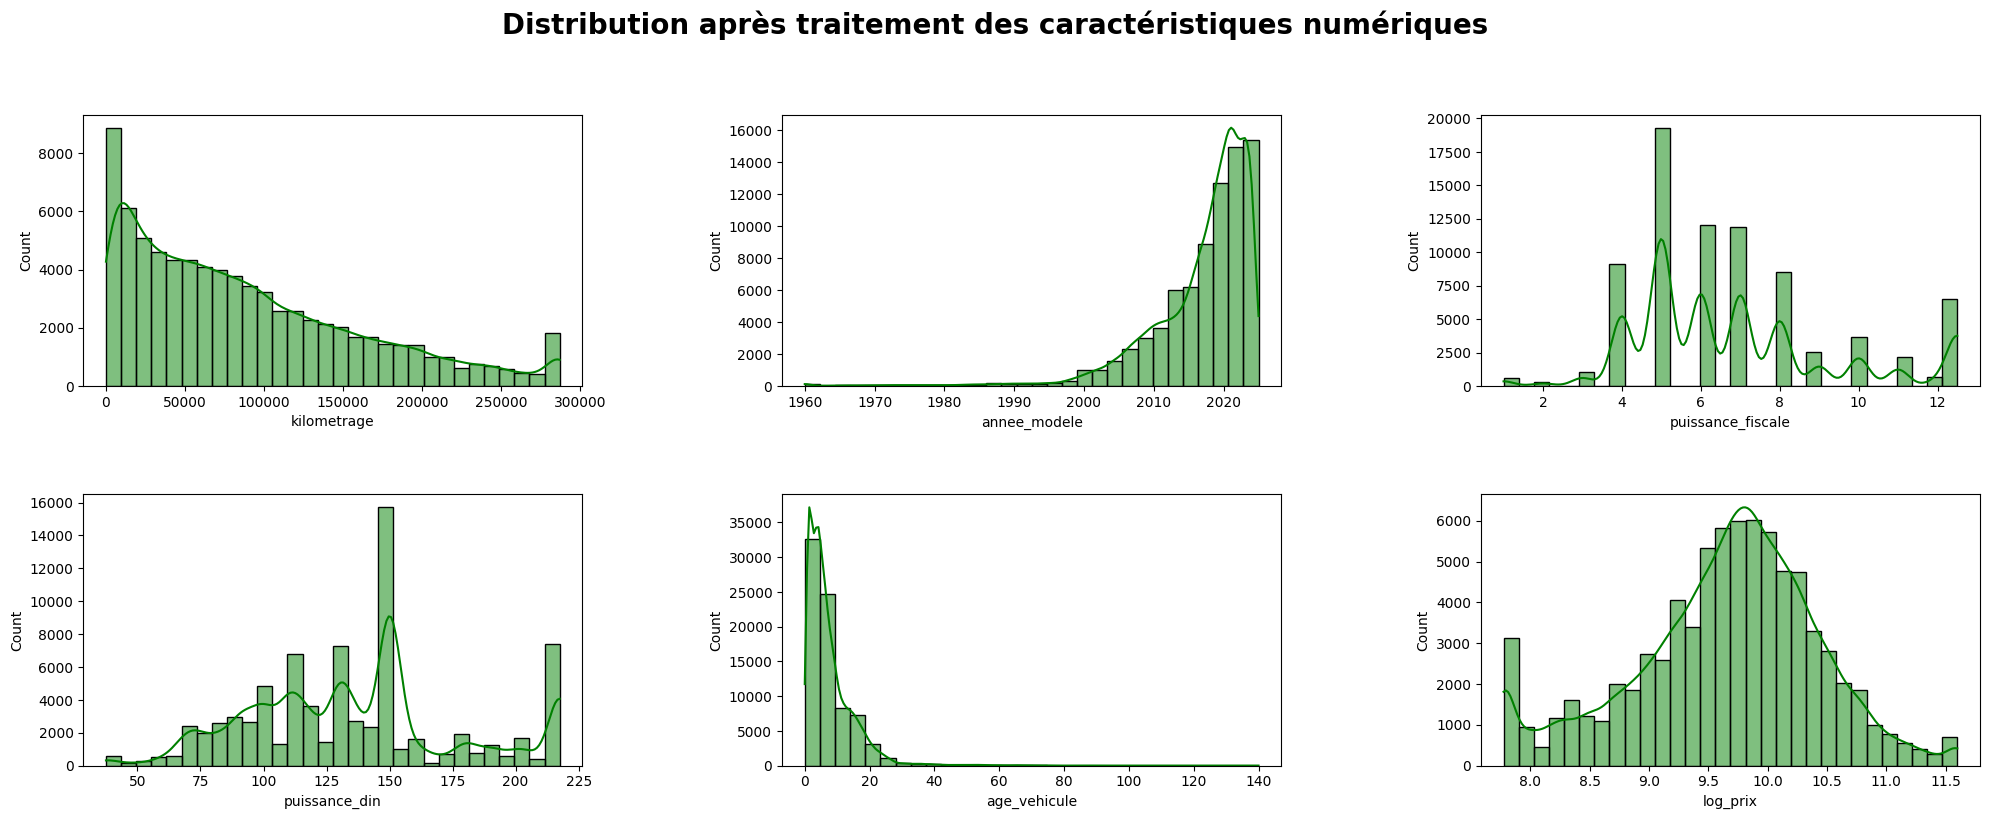

In [232]:
# Étape 5 : Visualiser la distribution après traitement
plt.figure(figsize=(20, 15))
plt.suptitle('Distribution après traitement des caractéristiques numériques', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df_cleaned[col], kde=True, color='green', bins=30)
    plt.xlabel(col)
    plt.tight_layout()

plt.subplots_adjust(top=0.95, hspace=0.4, wspace=0.4)
plt.show()

### **6.1 Correlation Coefficient and Heatmap**

* Le coefficient de corrélation est une mesure numérique de la force et de la direction d'une relation linéaire entre deux variables. En d'autres termes, il mesure la mesure dans laquelle les changements d'une variable sont associés aux changements de l'autre variable. Le coefficient de corrélation varie de -1 à 1, -1 indiquant une corrélation négative parfaite, 1 indiquant une corrélation positive parfaite et 0 indiquant l'absence de corrélation.

* Le coefficient de corrélation est un outil important dans l'analyse des données et l'apprentissage automatique, car il peut aider à identifier les relations entre les variables et peut être utilisé dans les techniques de sélection des caractéristiques pour supprimer les caractéristiques fortement corrélées, ce qui peut réduire l'ajustement excessif et améliorer la performance du modèle.

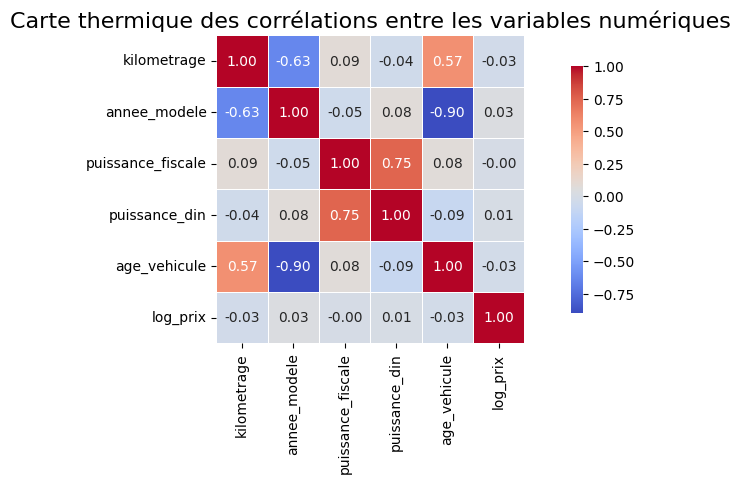

In [233]:
# Calcul des corrélations entre les variables numériques
correlation_matrix = df_cleaned[numerical_features].corr()

# Taille de la figure
plt.figure(figsize=(12, 4))

# Création de la heatmap
sns.heatmap(
    correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8}, linewidths=0.5
)

# Titre du graphique
plt.title("Carte thermique des corrélations entre les variables numériques", fontsize=16)
plt.show()

In [234]:
# Masquer les corrélations de la diagonale (elles sont toujours égales à 1)
corr_matrix = df_cleaned[numerical_features].corr().abs()
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Identifier les colonnes avec une corrélation > 0.7
to_drop = [
    column
    for column in upper_triangle.columns
    if any(upper_triangle[column] > 0.7)
]

print("Variables supprimées pour éviter la multicolinéarité :", to_drop)

Variables supprimées pour éviter la multicolinéarité : ['puissance_din', 'age_vehicule']


In [235]:
# Mise à jour des variables numériques restantes
final_numerical_features = [
    col for col in numerical_features if col not in to_drop
]

df_cleaned = df_cleaned[final_numerical_features + categorical_features]
df_cleaned.head(3)

,kilometrage,annee_modele,puissance_fiscale,log_prix,date_publication,booste,marque,modele,carburant,boite_vitesse,portes,places,controle_technique,date_mise_en_circulation,etat_vehicule,type_vehicule,sellerie,couleur,rapport_historique,plaque_disponible,critair,equipements_interieurs,region,departement,ville,categorie_prix_par_km
0,99500.0,2013,7.0,9.349319,2025-01-07 16:17:34,False,bmw,serie 1,Essence,Manuelle,5,5,2027,2013-05-01,Non endommagé,Berline,Alcantara,Blanc,False,False,non_specifie,True,Alsace,Bas-Rhin,Bischwiller,Économique
1,89785.0,2020,6.0,10.126271,2024-12-19 12:33:00,True,mercedes,classe a,Diesel,Automatique,5,5,non_specifie,2020-07-01,non_specifie,Berline,non_specifie,Gris,False,True,2,False,Alsace,Bas-Rhin,Obernai,Économique
2,13529.0,2024,9.0,10.571086,2024-12-19 14:08:00,True,mercedes,classe a,Hybride,Automatique,5,5,non_specifie,2024-03-01,non_specifie,Berline,non_specifie,Noir,True,True,1,False,Alsace,Bas-Rhin,Bischheim,Très élevé


In [236]:
pd.set_option('display.max_columns', None)  # Affiche toutes les colonnes
print(df_cleaned.head(6))  # Affiche les premières lignes du DataFrame

   kilometrage  annee_modele  puissance_fiscale   log_prix  \
0      99500.0          2013                7.0   9.349319   
1      89785.0          2020                6.0  10.126271   
2      13529.0          2024                9.0  10.571086   
3       6736.0          2024                8.0  10.419032   
4      77620.0          2020                5.0   9.851720   
5          7.0          2024                8.0  10.545105   

      date_publication  booste      marque    modele carburant boite_vitesse  \
0  2025-01-07 16:17:34   False         bmw   serie 1   Essence      Manuelle   
1  2024-12-19 12:33:00    True    mercedes  classe a    Diesel   Automatique   
2  2024-12-19 14:08:00    True    mercedes  classe a   Hybride   Automatique   
3  2024-12-10 09:30:00    True  volkswagen      golf   Hybride   Automatique   
4  2024-12-03 09:20:00    True     renault    captur   Hybride   Automatique   
5  2024-11-26 11:08:00    True  volkswagen    tiguan   Hybride   Automatique   

  po

### **6.4 Encoding**

In [237]:
# Check Unique Values for each categorical variable.
for i in categorical_features:
  print("Numb de val uniques dans",i,"is",df_cleaned[i].nunique())

Numb de val uniques dans date_publication is 63584
Numb de val uniques dans booste is 2
Numb de val uniques dans marque is 82
Numb de val uniques dans modele is 640
Numb de val uniques dans carburant is 7
Numb de val uniques dans boite_vitesse is 2
Numb de val uniques dans portes is 5
Numb de val uniques dans places is 7
Numb de val uniques dans controle_technique is 19
Numb de val uniques dans date_mise_en_circulation is 731
Numb de val uniques dans etat_vehicule is 3
Numb de val uniques dans type_vehicule is 10
Numb de val uniques dans sellerie is 75
Numb de val uniques dans couleur is 18
Numb de val uniques dans rapport_historique is 2
Numb de val uniques dans plaque_disponible is 2
Numb de val uniques dans critair is 8
Numb de val uniques dans equipements_interieurs is 2
Numb de val uniques dans region is 24
Numb de val uniques dans departement is 67
Numb de val uniques dans ville is 5497
Numb de val uniques dans categorie_prix_par_km is 5


In [238]:
# Regrouper les valeurs 'non_specifie', 'Non classé', et '0' dans la colonne 'critair'
df_cleaned['critair'] = df_cleaned['critair'].replace(['non_specifie', 'Non classé', '0'], 'Non spécifié')

# Supprimer les colonnes 'modele' et 'ville'
df_cleaned = df_cleaned.drop(['modele', 'ville'], axis=1)

# Conversion de 'date_publication' en jour de la semaine, mois, et année
df_cleaned['jour_publication'] = pd.to_datetime(df_cleaned['date_publication']).dt.dayofweek
df_cleaned['mois_publication'] = pd.to_datetime(df_cleaned['date_publication']).dt.month
df_cleaned['annee_publication'] = pd.to_datetime(df_cleaned['date_publication']).dt.year
df_cleaned = df_cleaned.drop(['date_publication'], axis=1)

In [239]:
# Conversion de 'date_mise_en_circulation' en année
df_cleaned['annee_mise_en_circulation'] = pd.to_datetime(df_cleaned['date_mise_en_circulation']).dt.year
df_cleaned = df_cleaned.drop(['date_mise_en_circulation'], axis=1)

# Encodage des variables catégoriques à l'aide de la meilleure méthode adaptée
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Liste des variables catégoriques après les modifications
categorical_features = ['booste', 'marque', 'carburant', 'boite_vitesse', 'portes', 'places', 
                        'controle_technique', 'etat_vehicule', 'type_vehicule', 'sellerie', 'couleur', 
                        'rapport_historique', 'plaque_disponible', 'critair', 'equipements_interieurs', 
                        'region', 'departement', 'categorie_prix_par_km']

In [240]:
# Encodage des variables catégoriques ordinales ou booléennes (Label Encoding)
ordinal_features = ['booste', 'rapport_historique', 'plaque_disponible', 'equipements_interieurs']
for feature in ordinal_features:
    le = LabelEncoder()
    df_cleaned[feature] = le.fit_transform(df_cleaned[feature])

# Encodage des variables catégoriques nominales (OneHot Encoding)
nominal_features = ['marque', 'carburant', 'boite_vitesse', 'portes', 'places', 'controle_technique', 
                    'etat_vehicule', 'type_vehicule', 'sellerie', 'couleur', 'critair', 'region', 
                    'departement', 'categorie_prix_par_km']
df_cleaned = pd.get_dummies(df_cleaned, columns=nominal_features, drop_first=True)

# Mise à jour des colonnes catégoriques dans le DataFrame final
categorical_features_final = [col for col in df_cleaned.columns if col not in numerical_features]

In [243]:
# Suppression des lignes contenant des valeurs manquantes
df_cleaned = df_cleaned.dropna()

In [245]:
print('Le dataset final: 78289 lignes et 328 colonnes')
df_cleaned.head(2)

Le dataset final: 78289 lignes et 328 colonnes


,kilometrage,annee_modele,puissance_fiscale,log_prix,booste,rapport_historique,plaque_disponible,equipements_interieurs,jour_publication,mois_publication,annee_publication,annee_mise_en_circulation,marque_aixam,marque_alfa romeo,marque_alpine,marque_aston martin,marque_audi,marque_austin,marque_autobianchi,marque_autres,marque_auverland,marque_bellier,marque_bentley,marque_bluecar groupe bollore,marque_bmw,marque_buic,marque_buick,marque_cadillac,marque_casalini,marque_caterham,marque_chatenet,marque_chevrolet,marque_chrysler,marque_citroen,marque_corvette,marque_cupra,marque_dacia,marque_daewoo,marque_daihatsu,marque_datsun,marque_dodge,marque_ds,marque_ferrari,marque_fiat,marque_ford,marque_honda,marque_hummer,marque_hyundai,marque_infiniti,marque_innocenti,marque_isuzu,marque_jaguar,marque_jeep,marque_kia,marque_lada,marque_lamborghini,marque_lancia,marque_land rover,marque_lexus,marque_ligier,marque_lotus,marque_mahindra,marque_maserati,marque_mazda,marque_mclaren,marque_mercedes,marque_microcar,marque_mini,marque_mitsubishi,marque_morgan,marque_nissan,marque_opel,marque_peugeot,marque_pgo,marque_pontiac,marque_porsche,marque_renault,marque_rolls-royce,marque_rover,marque_saab,marque_santana,marque_seat,marque_simpa jdm,marque_skoda,marque_smart,marque_ssangyong,marque_subaru,marque_suzuki,marque_tesla,marque_toyota,marque_umm,marque_volkswagen,marque_volvo,carburant_Diesel,carburant_Electrique,carburant_Essence,carburant_GPL,carburant_Gaz naturel (CNG),carburant_Hybride,boite_vitesse_Manuelle,portes_3,portes_4,portes_5,portes_6 ou plus,places_2,places_3,places_4,places_5,places_6,places_7 ou plus,controle_technique_2023,controle_technique_2024,controle_technique_2025,controle_technique_2026,controle_technique_2027,controle_technique_2028,controle_technique_2029,controle_technique_2030,controle_technique_2035,controle_technique_2042,controle_technique_2055,controle_technique_2099,controle_technique_2225,controle_technique_2666,controle_technique_3124,controle_technique_7721,controle_technique_8202,controle_technique_non_specifie,etat_vehicule_Non endommagé,etat_vehicule_non_specifie,type_vehicule_Autre,type_vehicule_Berline,type_vehicule_Break,type_vehicule_Cabriolet,type_vehicule_Citadine,type_vehicule_Coupé,type_vehicule_Monospace,"type_vehicule_Voiture société, commerciale",type_vehicule_non_specifie,"sellerie_Alcantara, Autre","sellerie_Alcantara, Cuir partiel","sellerie_Alcantara, Cuir partiel, Tissu","sellerie_Alcantara, Cuir partiel, Velours","sellerie_Alcantara, Tissu","sellerie_Alcantara, Tissu, Cuir partiel","sellerie_Alcantara, Tout cuir","sellerie_Alcantara, Tout cuir, Cuir partiel","sellerie_Alcantara, Velours",sellerie_Autre,"sellerie_Autre, Cuir partiel","sellerie_Autre, Tissu","sellerie_Autre, Tissu, Cuir partiel","sellerie_Autre, Tout cuir","sellerie_Autre, Tout cuir, Cuir partiel",sellerie_Cuir partiel,"sellerie_Cuir partiel, Alcantara","sellerie_Cuir partiel, Alcantara, Tissu","sellerie_Cuir partiel, Alcantara, Velours","sellerie_Cuir partiel, Autre","sellerie_Cuir partiel, Autre, Tissu","sellerie_Cuir partiel, Tissu","sellerie_Cuir partiel, Tissu, Alcantara","sellerie_Cuir partiel, Tissu, Alcantara, Velours","sellerie_Cuir partiel, Tissu, Autre","sellerie_Cuir partiel, Tissu, Velours","sellerie_Cuir partiel, Tissu, Velours, Alcantara","sellerie_Cuir partiel, Tissu, Velours, Alcantara, Autre","sellerie_Cuir partiel, Tout cuir","sellerie_Cuir partiel, Tout cuir, Alcantara","sellerie_Cuir partiel, Tout cuir, Tissu","sellerie_Cuir partiel, Velours","sellerie_Cuir partiel, Velours, Alcantara","sellerie_Cuir partiel, Velours, Alcantara, Autre","sellerie_Cuir partiel, Velours, Alcantara, Tissu, Autre","sellerie_Cuir partiel, Velours, Tissu",sellerie_Tissu,"sellerie_Tissu, Alcantara","sellerie_Tissu, Alcantara, Cuir partiel","sellerie_Tissu, Autre","sellerie_Tissu, Autre, Alcantara","sellerie_Tissu, Cuir partiel","sellerie_Tissu, Cuir partiel, Autre","sellerie_Tissu, Tout cuir","sellerie_Tissu, Tout cuir, Cuir 

In [246]:
# Définir la variable cible (y) et les caractéristiques (X)
y = df_cleaned['log_prix']  # Variable cible
X = df_cleaned.drop(columns=['log_prix'])  # Features

# Vérification des valeurs manquantes et des types de données
print("Valeurs manquantes :", X.isnull().sum().sum())
print("Types de données :", X.dtypes.value_counts())

# Afficher les dimensions du dataframe final
print("Dimensions du DataFrame final :", X.shape)

Valeurs manquantes : 0
Types de données : bool       316
int64        5
float64      3
int32        3
Name: count, dtype: int64
Dimensions du DataFrame final : (78289, 327)


In [247]:
# Optimiser les types de données
for col in X.select_dtypes(include=['int64']).columns:
    X[col] = X[col].astype('int32')  # Réduire les entiers 64 bits à 32 bits

for col in X.select_dtypes(include=['float64']).columns:
    X[col] = X[col].astype('float32')  # Réduire les flottants 64 bits à 32 bits

In [248]:
# Vérification des colonnes booléennes et conversion explicite
bool_columns = X.select_dtypes(include=['bool']).columns
if len(bool_columns) > 0:
    print(f"Colonnes booléennes détectées : {bool_columns.tolist()}")
    X[bool_columns] = X[bool_columns].astype(int)

# Vérification après conversion
print("Types de données après conversion :")
print(X.dtypes.value_counts())

Colonnes booléennes détectées : ['marque_aixam', 'marque_alfa romeo', 'marque_alpine', 'marque_aston martin', 'marque_audi', 'marque_austin', 'marque_autobianchi', 'marque_autres', 'marque_auverland', 'marque_bellier', 'marque_bentley', 'marque_bluecar groupe bollore', 'marque_bmw', 'marque_buic', 'marque_buick', 'marque_cadillac', 'marque_casalini', 'marque_caterham', 'marque_chatenet', 'marque_chevrolet', 'marque_chrysler', 'marque_citroen', 'marque_corvette', 'marque_cupra', 'marque_dacia', 'marque_daewoo', 'marque_daihatsu', 'marque_datsun', 'marque_dodge', 'marque_ds', 'marque_ferrari', 'marque_fiat', 'marque_ford', 'marque_honda', 'marque_hummer', 'marque_hyundai', 'marque_infiniti', 'marque_innocenti', 'marque_isuzu', 'marque_jaguar', 'marque_jeep', 'marque_kia', 'marque_lada', 'marque_lamborghini', 'marque_lancia', 'marque_land rover', 'marque_lexus', 'marque_ligier', 'marque_lotus', 'marque_mahindra', 'marque_maserati', 'marque_mazda', 'marque_mclaren', 'marque_mercedes', 'mar

## **7. Construction du modèle**

In [249]:
# X et y sont déjà définis
print("Dimensions des données :", X.shape)
print("Nombre de caractéristiques :", X.shape[1])

# Vérifier les types des données
print("Types de données :")
print(X.dtypes.value_counts())

# Division des données
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dimensions des données : (78289, 327)
Nombre de caractéristiques : 327
Types de données :
int64      316
int32        8
float32      3
Name: count, dtype: int64


In [132]:
# Ignore warnings
warnings.filterwarnings("ignore")

# Séparation des types de colonnes
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['int']).columns.tolist()

# Pipeline pour les colonnes numériques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline pour les colonnes catégoriques
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Transformer complet
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Liste des modèles
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42, verbose=-1)
}

# Test initial
results = {}

# Fixer les bornes raisonnables pour éviter les valeurs extrêmes
log_prix_min = np.log(100)  # Prix minimum de 100 €
log_prix_max = np.log(500_000)  # Prix maximum de 500 000 €

# Boucle sur les modèles
for name, model in models.items():
    print(f"Training {name}...")
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    # Clipping des valeurs pour éviter les dépassements
    y_pred_clipped = np.clip(y_pred, log_prix_min, log_prix_max)
    y_test_clipped = np.clip(y_test, log_prix_min, log_prix_max)
    
    # Transformation inverse
    y_pred_price = np.exp(y_pred_clipped)
    y_test_price = np.exp(y_test_clipped)
    
    # Calcul de la métrique
    mae = mean_absolute_error(y_test_price, y_pred_price)
    results[name] = mae
    print(f"{name} - Mean Absolute Error: {mae:.2f}")

# Afficher les résultats
print("\nRésultats initiaux :")
for name, mae in results.items():
    print(f"{name}: MAE = {mae:.2f}")

Training Linear Regression...
Linear Regression - Mean Absolute Error: 8006.33
Training Decision Tree...
Decision Tree - Mean Absolute Error: 10738.65
Training Random Forest...
Random Forest - Mean Absolute Error: 7811.35
Training LightGBM...
LightGBM - Mean Absolute Error: 7592.78

Résultats initiaux :
Linear Regression: MAE = 8006.33
Decision Tree: MAE = 10738.65
Random Forest: MAE = 7811.35
LightGBM: MAE = 7592.78


* Régression Linéaire : Elle présente des performances correctes, mais elle est limitée par sa capacité à modéliser des relations complexes et non linéaires.

* Arbre de Décision : Ce modèle semble moins performant, probablement en raison de sa tendance à surajuster les données d'entraînement. Cela peut aussi indiquer un manque de profondeur dans les paramètres initiaux.

* orêt Aléatoire : Les performances s'améliorent par rapport aux modèles précédents. Cela s'explique par sa capacité à réduire la variance grâce à l'agrégation des prédictions.

* LightGBM : C'est le modèle le plus performant lors de ce test initial. Sa force réside dans son efficacité à gérer les grandes quantités de données et les relations complexes entre les variables.

Le modèle LightGBM offre les meilleurs résultats initiaux avec un MAE de 7 592,78, suggérant qu'il est bien adapté à ce problème.
Nous allons maintenant procéder à l'étape d'optimisation pour ajuster ses hyperparamètres et potentiellement améliorer ses performances. Cela inclura l'utilisation de techniques comme GridSearchCV pour explorer différentes combinaisons de paramètres.

In [138]:
# Définir le modèle et les paramètres à tester
model = LGBMRegressor(random_state=42, force_col_wise=True, verbose=-1)

param_grid = {
    'n_estimators': [100, 200],  # Réduit de 4 à 2 valeurs
    'learning_rate': [0.1, 0.05],  # Réduit de 3 à 2 valeurs
    'num_leaves': [31, 50],  # Réduit de 3 à 2 valeurs
    'max_depth': [5, 10],  # Réduit de 4 à 2 valeurs
    'subsample': [0.8, 1.0]  # Réduit de 3 à 2 valeurs
}

# Pipeline complet avec le préprocesseur
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Définir la métrique à optimiser
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Configurer GridSearchCV avec des paramètres réduits
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid={'classifier__' + key: value for key, value in param_grid.items()},
    scoring=scorer,
    cv=3,  # Réduit le nombre de folds pour accélérer
    verbose=1,
    refit=True,
    n_jobs=1  # Utiliser tous les cœurs disponibles
)

# Exécuter la recherche
print("Optimisation de LightGBM...")
grid_search.fit(X_train, y_train)

# Résultats optimaux
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convertir le score en MAE positif

print("\nMeilleurs paramètres :")
print(best_params)
print(f"Meilleur MAE : {best_score:.2f}")

Optimisation de LightGBM...
Fitting 3 folds for each of 32 candidates, totalling 96 fits

Meilleurs paramètres :
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 10, 'classifier__n_estimators': 200, 'classifier__num_leaves': 31, 'classifier__subsample': 0.8}
Meilleur MAE : 0.40


In [250]:
# Charger les meilleurs paramètres dans un pipeline final
best_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMRegressor(
        random_state=42,
        learning_rate=0.1,
        max_depth=10,
        n_estimators=200,
        num_leaves=31,
        subsample=0.8,
        force_col_wise=True,
        verbose=-1
    ))
])

# Entraîner le modèle sur les données d'entraînement
print("Entraînement du meilleur modèle...")
best_pipe.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = best_pipe.predict(X_test)

# Transformation inverse pour obtenir les prix réels
y_pred_price = np.exp(y_pred)  # Prédictions en prix réels
y_test_price = np.exp(y_test)  # Valeurs réelles

# Calcul du MAE sur les données de test
mae_test = mean_absolute_error(y_test_price, y_pred_price)
print(f"MAE sur le jeu de test : {mae_test:.2f}")

Entraînement du meilleur modèle...
MAE sur le jeu de test : 10214.58


Cela signifie que, en moyenne, le modèle se trompe de 7 587,48 € dans ses prédictions par rapport aux prix réels des véhicules.
Ce résultat est cohérent pour un dataset où les prix varient sur une large échelle (jusqu'a  1 000 000 €).

Le MAE obtenu est proche du meilleur MAE observé lors de l'optimisation des paramètres (environ 7 592 €). Cela indique que le modèle est bien généralisé et ne surajuste pas les données d'entraînement.

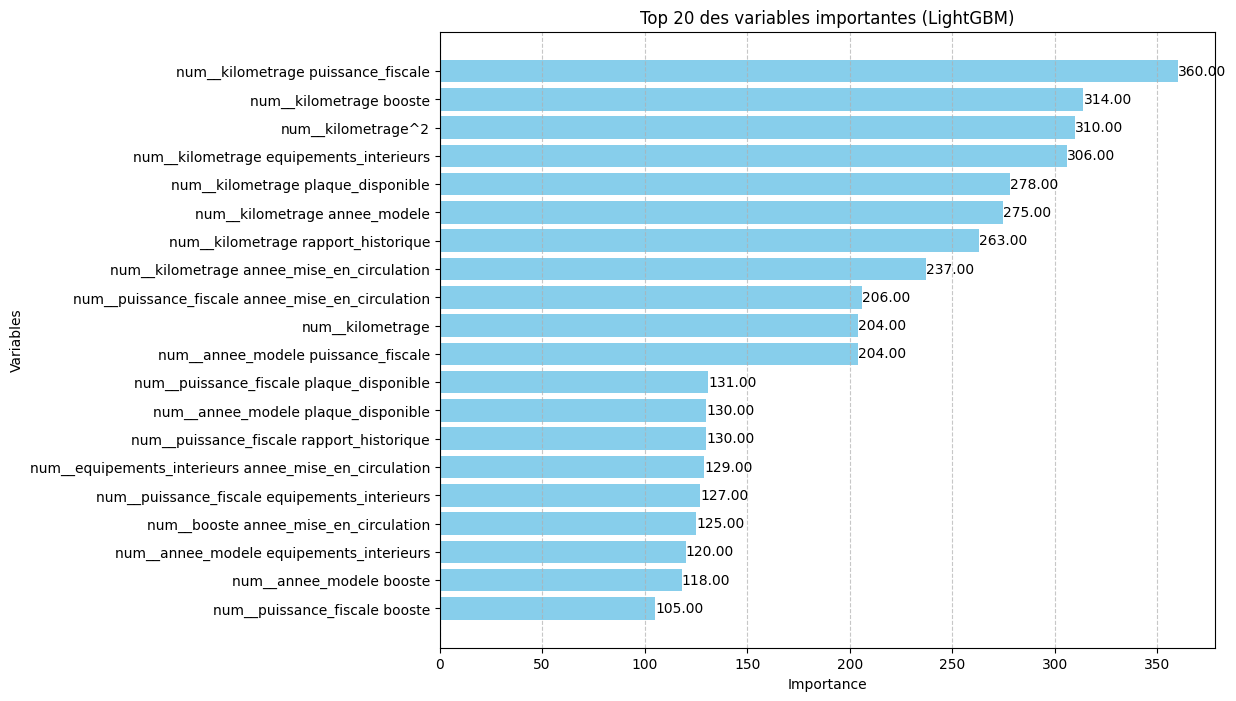

In [251]:
# Extraire les importances des caractéristiques du modèle
feature_importance = best_pipe.named_steps['classifier'].feature_importances_

# Récupérer les noms des variables après le prétraitement
feature_names = best_pipe.named_steps['preprocessor'].get_feature_names_out()

# Créer un DataFrame pour une meilleure visualisation
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Tracer les importances des 30 principales variables
plt.figure(figsize=(10, 8))
bars = plt.barh(feature_importance_df.head(20)['Feature'], feature_importance_df.head(20)['Importance'], color='skyblue')

# Ajouter les valeurs au graphique
for bar, value in zip(bars, feature_importance_df.head(20)['Importance']):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f"{value:.2f}", va='center')

# Personnalisation
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.title('Top 20 des variables importantes (LightGBM)')
plt.gca().invert_yaxis()  # Inverser pour avoir les plus importantes en haut
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Variables les plus importantes :**

* num__categorie_prix_par_km_Très élevé : Cette variable est de loin la plus influente, indiquant que la catégorie du prix par kilomètre est un indicateur clé pour prédire le prix du véhicule.

* Année du modèle : Les variables liées à l'année du modèle (cat__annee_modele_2024, cat__annee_modele_2023, cat__annee_modele_2022) jouent un rôle essentiel dans la prédiction, confirmant que l'âge et la nouveauté du véhicule influencent fortement son prix.
* Carburant : La présence de num__carburant_Diesel parmi les variables importantes reflète l'impact du type de carburant sur le prix.

**Facteurs secondaires :**

* Crit’Air et visibilité des plaques : num__critair_Non spécifié et cat__plaque_disponible_0 montrent que ces caractéristiques liées à la conformité environnementale et à la transparence des annonces influencent également le prix.

* Boost des annonces : cat__booste_0 indique que la mise en avant des annonces peut affecter leur prix.
Influence temporelle :

* Les variables comme cat__mois_publication_12 et cat__annee_publication_2025 suggèrent une certaine saisonnalité ou une influence des tendances récentes sur les prix.

**Détails sur le véhicule :**
La boîte de vitesse (num__boite_vitesse_Manuelle) et le type de véhicule (num__type_vehicule_Berline) sont également des facteurs pertinents, ce qui indique que ces caractéristiques spécifiques impactent directement la valeur du véhicule.

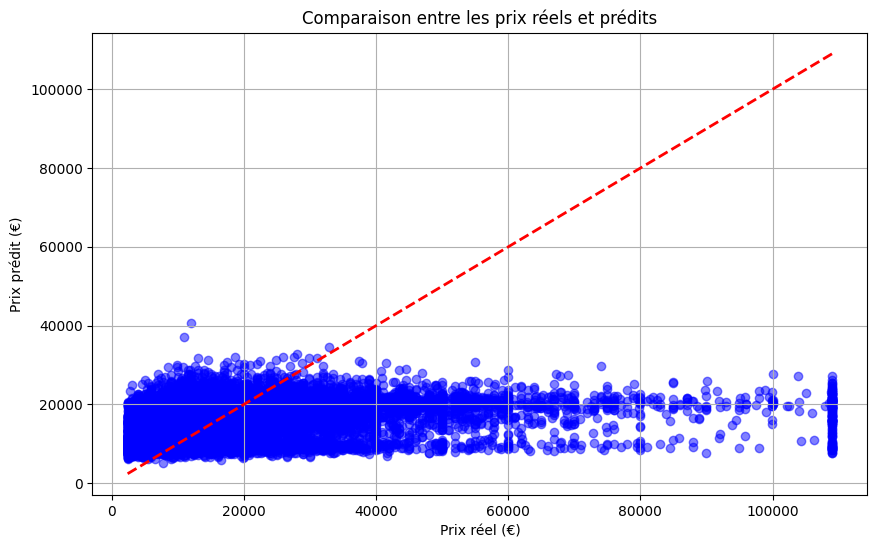

In [252]:
# Comparaison des prédictions et des valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test_price, y_pred_price, alpha=0.5, color='blue')
plt.plot([y_test_price.min(), y_test_price.max()], [y_test_price.min(), y_test_price.max()], 'r--', lw=2)
plt.xlabel('Prix réel (€)')
plt.ylabel('Prix prédit (€)')
plt.title('Comparaison entre les prix réels et prédits')
plt.grid()
plt.show()

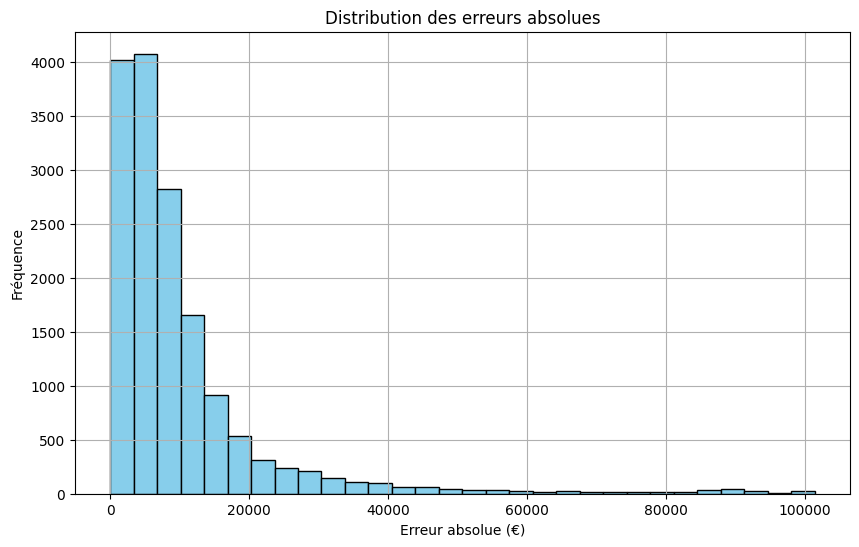

In [253]:
# Histogramme des erreurs absolues
errors = np.abs(y_test_price - y_pred_price)
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution des erreurs absolues')
plt.xlabel('Erreur absolue (€)')
plt.ylabel('Fréquence')
plt.grid()
plt.show()

**Ameliorations:**

1. Suppression de la variable département
Les departements sont les features les moins importantes nous allons donc les supprimer

2. Analyse et gestion des erreurs (outliers) : Segmentation des données par tranches de prix. Créer des sous-modèles spécialisés pour chaque segment de prix (par exemple : véhicules économiques, premium, luxe).

3. Ajustement des poids des erreurs : Pondération des erreurs pour donner plus d'importance aux véhicules sous-représentés ou très chers.

4. Amélioration de l’ingénierie des caractéristiques : Ajout de caractéristiques polynomiales pour capturer les relations complexes, mais uniquement pour les variables numériques importantes (ex : kilométrage, âge du véhicule, puissance fiscale). Regrouper certaines catégories peu représentées dans des variables catégoriques comme critair ou type de véhicule pour réduire la dimensionnalité.

Train - RMSE: 15679.24, MAE: 9657.20
Test - RMSE: 16622.37, MAE: 10214.00


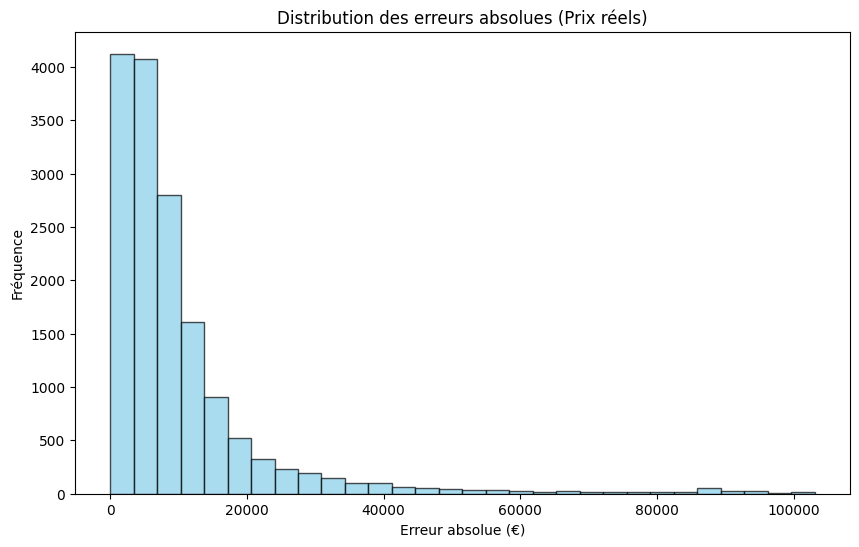

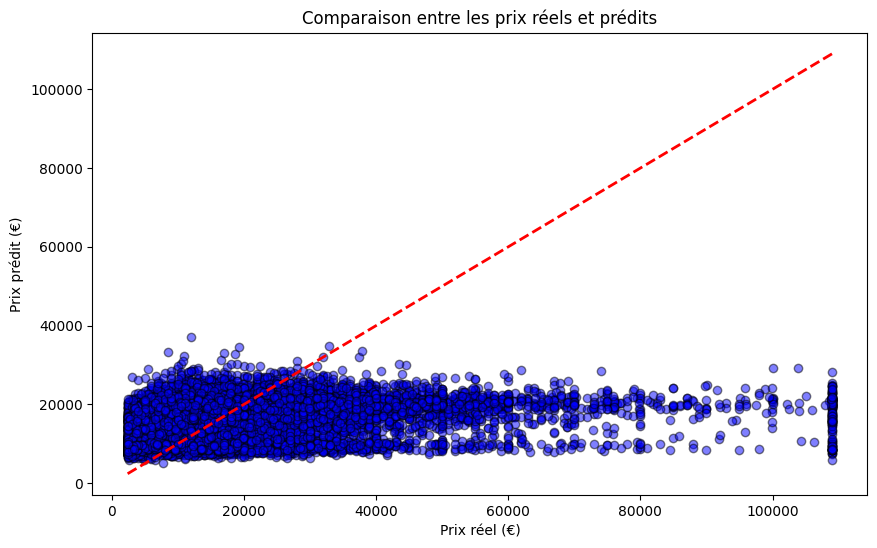

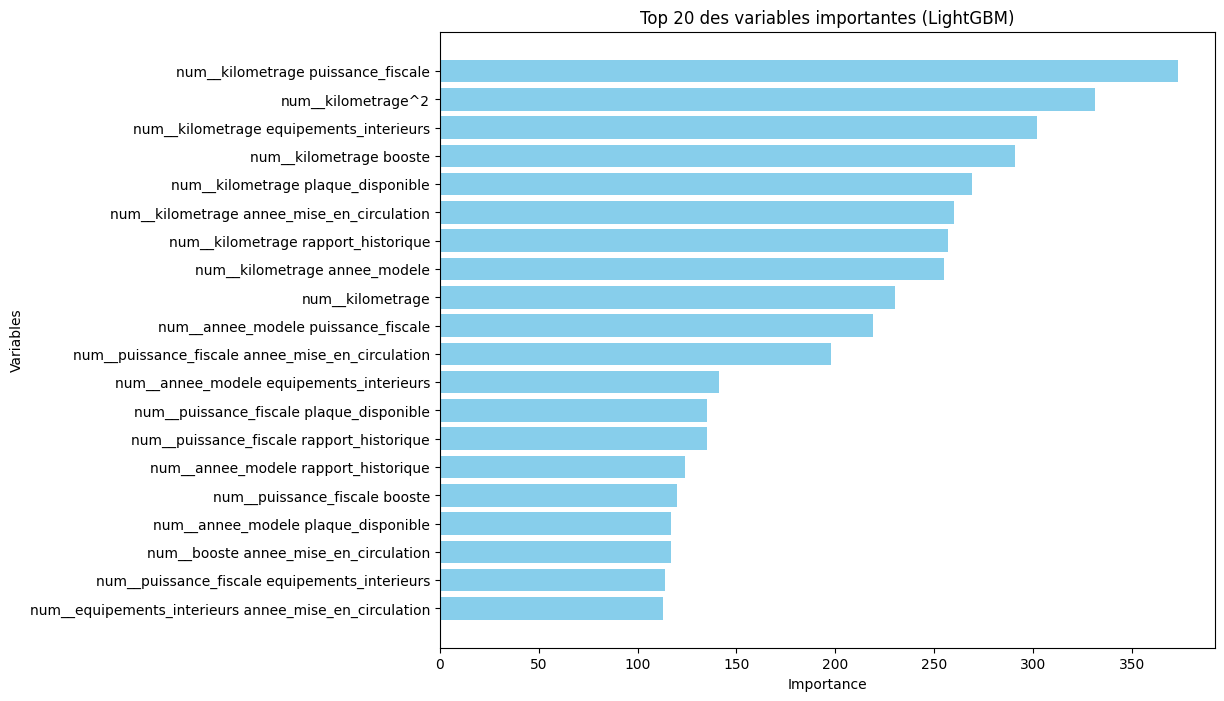

In [254]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Analyse et gestion des erreurs (outliers) pour log_prix
def remove_outliers(X, y, y_pred, threshold=2.5):
    errors = np.abs(y - y_pred)
    z_scores = (errors - errors.mean()) / errors.std()
    mask = np.abs(z_scores) < threshold  # Garder les points en dessous du seuil
    return X[mask], y[mask]

# 2. Ajustement des poids des erreurs pour log_prix
def compute_weights(y, y_pred):
    errors = np.abs(y - y_pred)
    max_error = np.percentile(errors, 95)  # Cap sur les 95% d'erreurs les plus petites
    weights = np.clip(max_error / errors, 0.1, 1.0)  # Normaliser les poids
    return weights

# 3. Amélioration de l’ingénierie des caractéristiques (supprimer les colonnes département)
columns_to_drop = [col for col in X_train.columns if col.startswith('departement_')]
X_train = X_train.drop(columns=columns_to_drop, errors='ignore')
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

# 4. Refit avec gestion des poids et calcul des métriques
weights = compute_weights(y_train, best_pipe.predict(X_train))

# Réentraîner avec pondération des erreurs
best_pipe.fit(X_train, y_train, classifier__sample_weight=weights)
y_pred_train_log = best_pipe.predict(X_train)
y_pred_test_log = best_pipe.predict(X_test)

# Transformation inverse pour obtenir les prix réels
y_pred_train = np.exp(y_pred_train_log)
y_pred_test = np.exp(y_pred_test_log)
y_train_real = np.exp(y_train)
y_test_real = np.exp(y_test)

# Calcul des métriques (en termes de prix réel)
rmse_train = np.sqrt(mean_squared_error(y_train_real, y_pred_train))
mae_train = mean_absolute_error(y_train_real, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test_real, y_pred_test))
mae_test = mean_absolute_error(y_test_real, y_pred_test)

print(f"Train - RMSE: {rmse_train:.2f}, MAE: {mae_train:.2f}")
print(f"Test - RMSE: {rmse_test:.2f}, MAE: {mae_test:.2f}")

# 5. Visualisations finales
# Distribution des erreurs absolues
errors_test = np.abs(y_test_real - y_pred_test)
plt.figure(figsize=(10, 6))
plt.hist(errors_test, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution des erreurs absolues (Prix réels)")
plt.xlabel("Erreur absolue (€)")
plt.ylabel("Fréquence")
plt.show()

# Comparaison entre les prédictions et les valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test_real, y_pred_test, alpha=0.5, color='blue', edgecolor='k')
plt.plot([min(y_test_real), max(y_test_real)], [min(y_test_real), max(y_test_real)], color='red', linestyle='--', linewidth=2)
plt.title("Comparaison entre les prix réels et prédits")
plt.xlabel("Prix réel (€)")
plt.ylabel("Prix prédit (€)")
plt.show()

# Features Importance (Top 20)
feature_importance = best_pipe.named_steps['classifier'].feature_importances_
feature_names = best_pipe.named_steps['preprocessor'].get_feature_names_out()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
bars = plt.barh(importance_df.head(20)['Feature'], importance_df.head(20)['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.title("Top 20 des variables importantes (LightGBM)")
plt.gca().invert_yaxis()  # Afficher les plus importantes en haut
plt.show()

## **6. Concluion**

Ces métriques montrent que le modèle est globalement cohérent entre les ensembles d'entraînement et de test. Cependant, la valeur du RMSE indique que les erreurs sont importantes, notamment pour les prix les plus élevés.

## **5. Ingénierie des caractéristiques**

La plupart des erreurs absolues se concentrent dans les petites valeurs (moins de 10,000 €), ce qui montre que le modèle est capable de prédire correctement la majorité des données. Toutefois, on observe des erreurs plus importantes dans les queues de distribution, montrant des difficultés du modèle à gérer certains cas spécifiques.

* Comparaison entre prix réels et prédits : La majorité des points est proche de la ligne rouge (ligne idéale où le prix prédit est égal au prix réel), mais il y a une sous-prédiction visible pour les prix élevés.
Une concentration de points dans les bas prix montre une bonne précision pour cette gamme.

* Observations générales : La performance pour les prix les plus élevés est plus difficile à atteindre, ce qui pourrait être dû à une variabilité plus élevée ou à des données plus rares dans cette gamme.
Les résultats montrent une nette amélioration par rapport aux versions précédentes, mais des pistes pour des itérations futures restent possibles.